# • DOMAIN: Electronics and Telecommunication

## • PROJECT OBJECTIVE: The need is to build a regressor which can use these parameters to determine the signal strength or quality [as number]

Installation of TensorFlow
Method 1:
Step 1: Open Anaconda Prompt and Type following command
    conda create -n tf-n-gpu python 
Step 2: Type following command
    conda activate tf-n-gpu
       
        OR
        
Method 2:
Write following command in jupyter notebook
    !pip install tf-nightly-gpu
    
        OR
Method 3: If you use collab then write the following command in colab notebook

%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

In [1]:
!pip install tf-nightly-gpu

## 1. Import data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.models import load_model

In [3]:
#import tensorflow as tf
import tensorflow as tf

In [4]:
tf.__version__

'2.8.0-dev20211109'

In [5]:
signal_df=pd.read_csv('Part- 1 - Signal.csv')
signal_df.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Signal_Strength  
0           9.4                5  
1           9.8                5  
2           9.8                5  
3           9.8                6  
4           9.4                5

## 2. Data analysis & visualisation

### • Perform relevant and detailed statistical analysis on the data.

In [6]:
print(signal_df.shape)
print(signal_df.size)

(1599, 12)
19188


In [7]:
signal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
signal_df.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [9]:
dups=signal_df.duplicated()
print('Number of duplicate rows=%d'%(dups.sum()))

Number of duplicate rows=240


In [10]:
signal_df.drop_duplicates(keep=False,inplace=True)

In [11]:
dups=signal_df.duplicated()
print('Number of duplicate rows=%d'%(dups.sum()))

Number of duplicate rows=0


In [12]:
print(signal_df.shape)
print(signal_df.size)

(1139, 12)
13668


In [13]:
signal_df.isna().values.any()

False

In [14]:
signal_df.describe()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
count  1139.000000  1139.000000  1139.000000  1139.000000  1139.000000   
mean      8.287884     0.531172     0.273477     2.493635     0.088897   
std       1.725696     0.188279     0.196370     1.257423     0.052059   
min       4.600000     0.160000     0.000000     1.200000     0.034000   
25%       7.100000     0.390000     0.095000     1.900000     0.069000   
50%       7.900000     0.520000     0.260000     2.200000     0.079000   
75%       9.200000     0.645000     0.430000     2.600000     0.091000   
max      15.900000     1.580000     1.000000    15.500000     0.611000   

       Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
count  1139.000000  1139.000000  1139.000000  1139.000000   1139.000000   
mean     15.929763    47.152766     0.996648     3.308903      0.659306   
std      10.392575    33.993453     0.001835     0.155179      0.171698   
min       1.000000     6.000000     0.990200     2.740000      0.330000   
25%       7.000000    22.000000     0.995540     3.210000      0.550000   
50%      14.000000    38.000000     0.996660     3.310000      0.620000   
75%      21.000000    63.000000     0.997800     3.400000      0.720000   
max      72.000000   289.000000     1.003200     4.010000      2.000000   

       Parameter 11  Signal_Strength  
count   1139.000000      1139.000000  
mean      10.441864         5.608428  
std        1.099890         0.843334  
min        8.400000         3.000000  
25%        9.500000         5.000000  
50%       10.200000         6.000000  
75%       11.200000         6.000000  
max       14.900000         8.000000

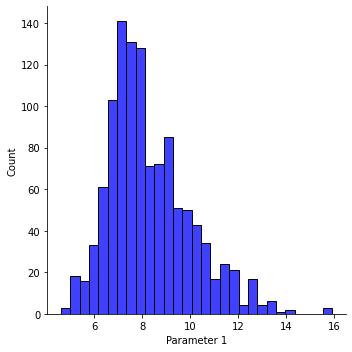

Distribution of  Parameter 1
Mean is : 8.28788410886744
Median is : 7.9
Mode is : 0    7.8
dtype: float64
Standard Deviation is : 1.725695601250208
Skewness is : 0.889582473732798
Max is : 15.9
Min is : 4.6


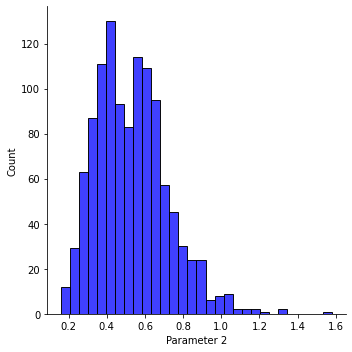

Distribution of  Parameter 2
Mean is : 0.5311720807726067
Median is : 0.52
Mode is : 0    0.58
dtype: float64
Standard Deviation is : 0.18827869415178497
Skewness is : 0.7776814335236473
Max is : 1.58
Min is : 0.16


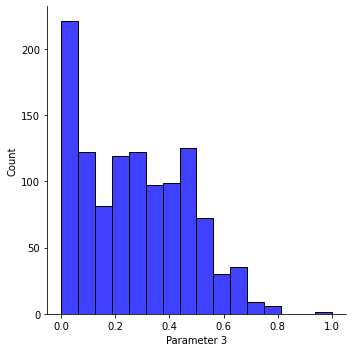

Distribution of  Parameter 3
Mean is : 0.2734767339771723
Median is : 0.26
Mode is : 0    0.0
dtype: float64
Standard Deviation is : 0.19637047617552122
Skewness is : 0.30409117401465385
Max is : 1.0
Min is : 0.0


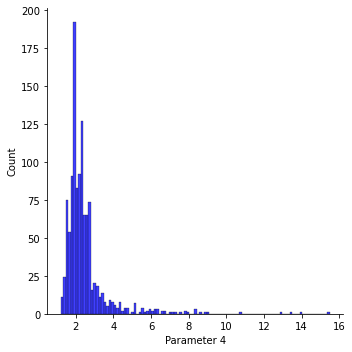

Distribution of  Parameter 4
Mean is : 2.4936347673397727
Median is : 2.2
Mode is : 0    2.0
dtype: float64
Standard Deviation is : 1.25742307414878
Skewness is : 4.517630558681031
Max is : 15.5
Min is : 1.2


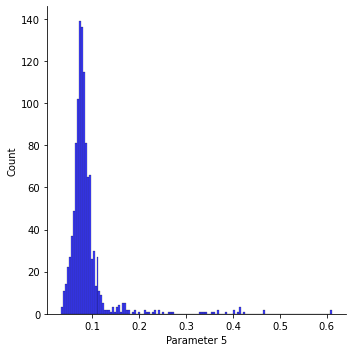

Distribution of  Parameter 5
Mean is : 0.08889727831431052
Median is : 0.079
Mode is : 0    0.078
1    0.080
dtype: float64
Standard Deviation is : 0.05205890085074824
Skewness is : 5.310015644115136
Max is : 0.611
Min is : 0.034


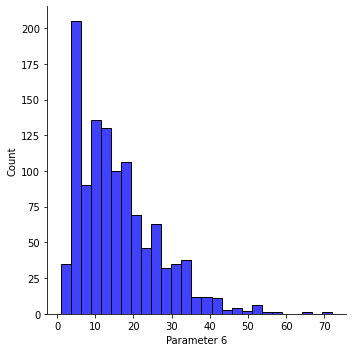

Distribution of  Parameter 6
Mean is : 15.929762949956102
Median is : 14.0
Mode is : 0    6.0
dtype: float64
Standard Deviation is : 10.392574620239875
Skewness is : 1.1941467077254027
Max is : 72.0
Min is : 1.0


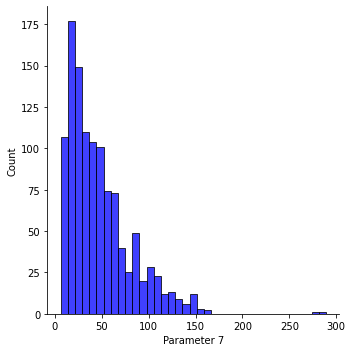

Distribution of  Parameter 7
Mean is : 47.15276558384548
Median is : 38.0
Mode is : 0    24.0
dtype: float64
Standard Deviation is : 33.99345303952585
Skewness is : 1.5846303733443814
Max is : 289.0
Min is : 6.0


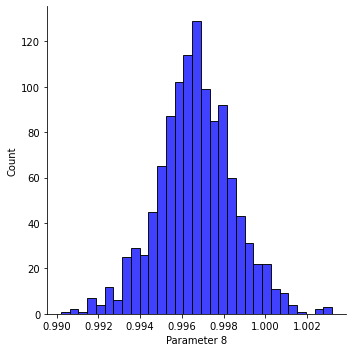

Distribution of  Parameter 8
Mean is : 0.996648261633012
Median is : 0.99666
Mode is : 0    0.9968
dtype: float64
Standard Deviation is : 0.0018345172569192174
Skewness is : 0.011417162600728187
Max is : 1.0032
Min is : 0.9902


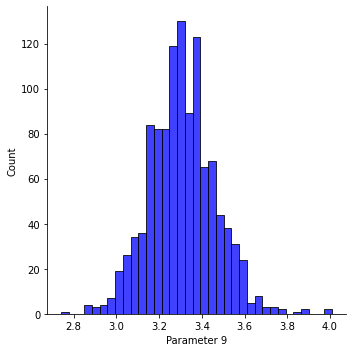

Distribution of  Parameter 9
Mean is : 3.308902546093066
Median is : 3.31
Mode is : 0    3.26
1    3.30
2    3.34
dtype: float64
Standard Deviation is : 0.1551792664304459
Skewness is : 0.2736671598580435
Max is : 4.01
Min is : 2.74


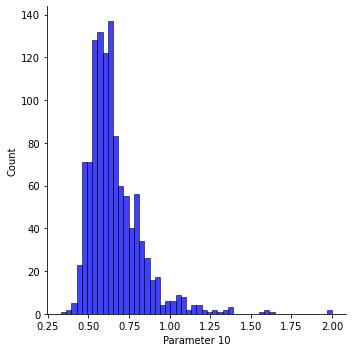

Distribution of  Parameter 10
Mean is : 0.6593064091308164
Median is : 0.62
Mode is : 0    0.54
dtype: float64
Standard Deviation is : 0.17169769501605278
Skewness is : 2.3666624717187688
Max is : 2.0
Min is : 0.33


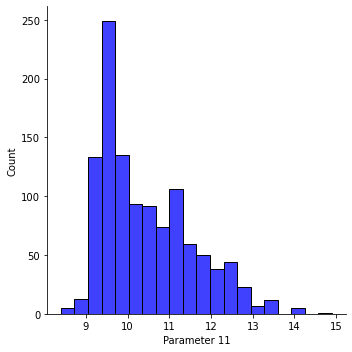

Distribution of  Parameter 11
Mean is : 10.441864208375755
Median is : 10.2
Mode is : 0    9.5
dtype: float64
Standard Deviation is : 1.099889774314669
Skewness is : 0.8595552817400739
Max is : 14.9
Min is : 8.4


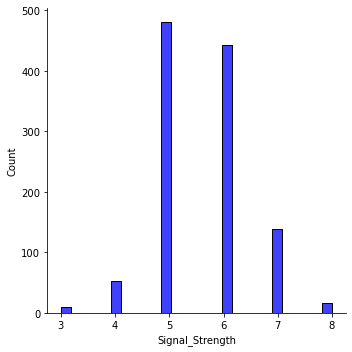

Distribution of  Signal_Strength
Mean is : 5.608428446005267
Median is : 6.0
Mode is : 0    5
dtype: int64
Standard Deviation is : 0.8433337722527776
Skewness is : 0.1631298923436497
Max is : 8
Min is : 3


In [15]:
cols=list(signal_df)
for i in np.arange(len(cols)):
    sns.displot(signal_df[cols[i]],color='blue')
    plt.show()
    print('Distribution of ',cols[i])
    print('Mean is :',signal_df[cols[i]].mean())
    print('Median is :',signal_df[cols[i]].median())
    print('Mode is :',signal_df[cols[i]].mode())
    print('Standard Deviation is :',signal_df[cols[i]].std())
    print('Skewness is :',signal_df[cols[i]].skew())
    print('Max is :',signal_df[cols[i]].max())
    print('Min is :',signal_df[cols[i]].min())

<AxesSubplot:xlabel='Signal_Strength', ylabel='count'>

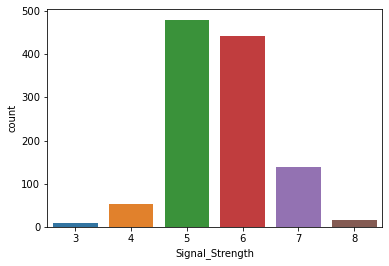

In [16]:
sns.countplot(signal_df['Signal_Strength'])

<AxesSubplot:xlabel='Parameter 11'>

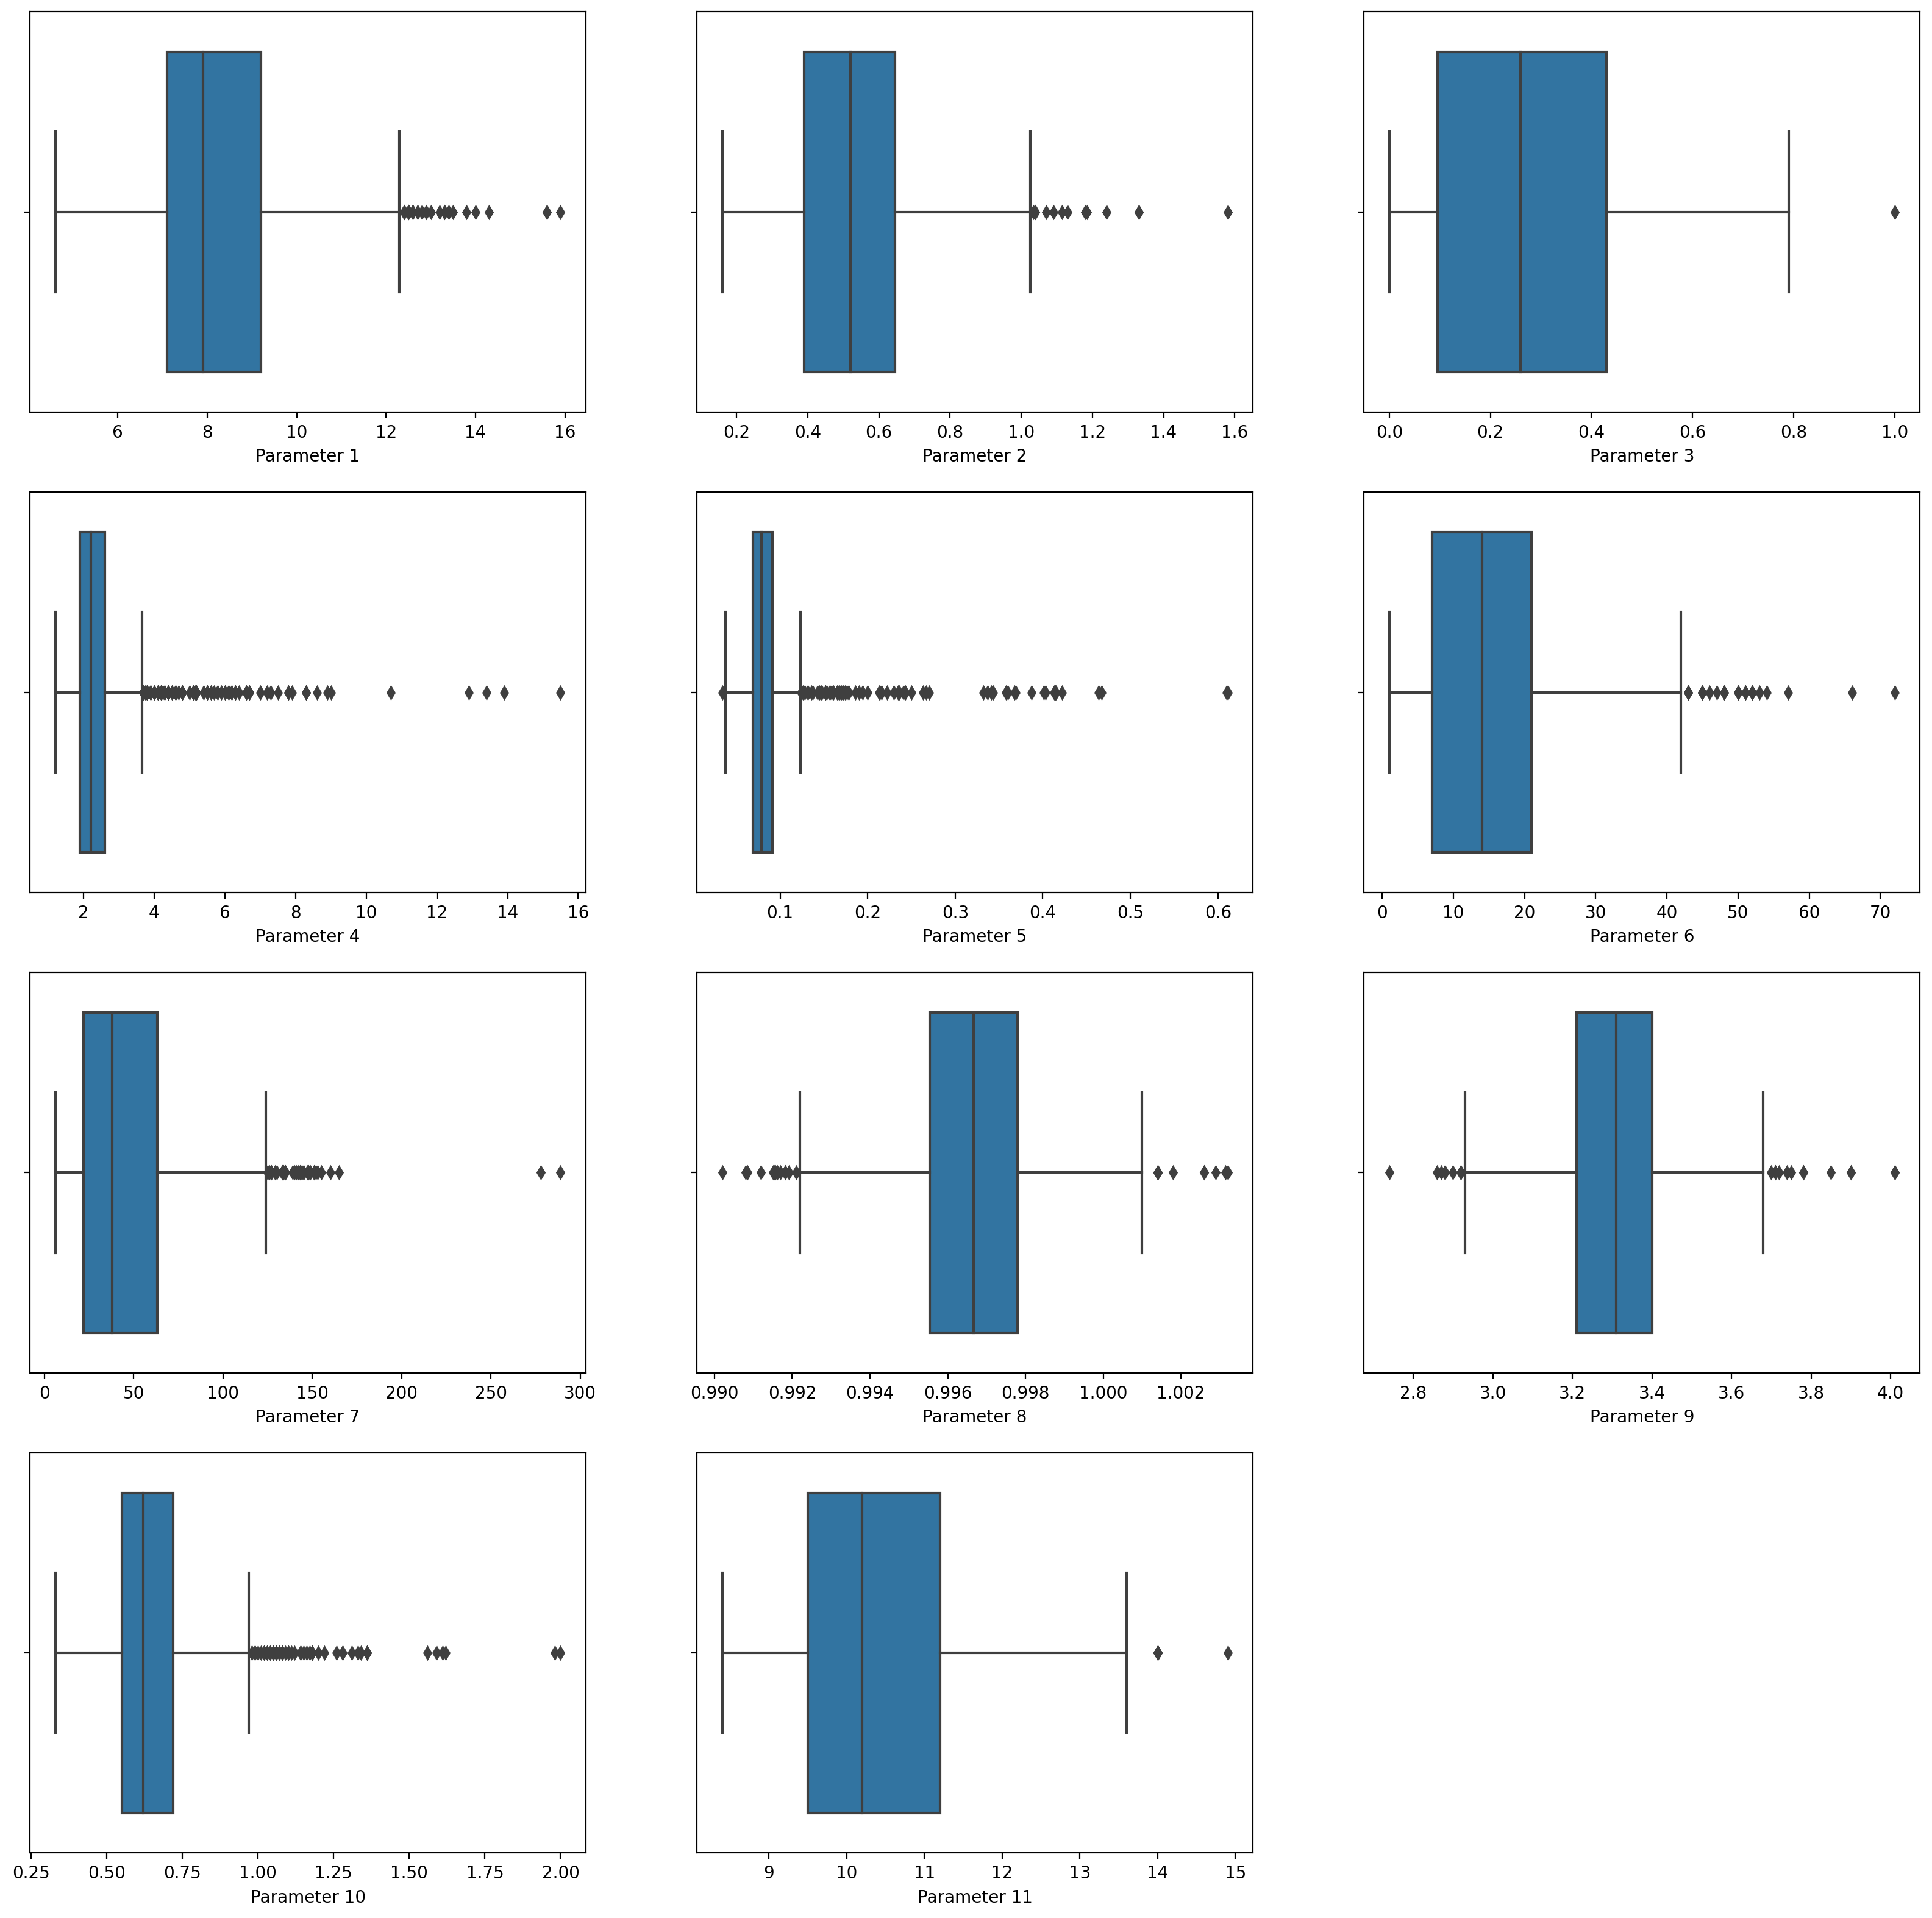

In [17]:
#Check for outliers

plt.figure(figsize=(20,20),dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x='Parameter 1',data=signal_df)

plt.subplot(4,3,2)
sns.boxplot(x='Parameter 2',data=signal_df)

plt.subplot(4,3,3)
sns.boxplot(x='Parameter 3',data=signal_df)

plt.subplot(4,3,4)
sns.boxplot(x='Parameter 4',data=signal_df)

plt.subplot(4,3,5)
sns.boxplot(x='Parameter 5',data=signal_df)

plt.subplot(4,3,6)
sns.boxplot(x='Parameter 6',data=signal_df)

plt.subplot(4,3,7)
sns.boxplot(x='Parameter 7',data=signal_df)

plt.subplot(4,3,8)
sns.boxplot(x='Parameter 8',data=signal_df)

plt.subplot(4,3,9)
sns.boxplot(x='Parameter 9',data=signal_df)

plt.subplot(4,3,10)
sns.boxplot(x='Parameter 10',data=signal_df)

plt.subplot(4,3,11)
sns.boxplot(x='Parameter 11',data=signal_df)

In [18]:
#calculating the outliers
l=len(signal_df)
col=list(signal_df.columns)

Q1=signal_df[col[i]].quantile(0.25)
Q2=signal_df[col[i]].quantile(0.50)
Q3=signal_df[col[i]].quantile(0.75)

IQR=Q3-Q1 #Finding the IQR

#Finding the Upper and Lower limit
u_limit=(Q3+1.5*IQR)
l_limit=(Q1-1.5*IQR)

print('Q1 is :',Q1)
print('Q2 is :',Q2)
print('Q3 is :',Q3)
print('IQR is :',IQR)
print('Upper limit :',u_limit)
print('Lower limit :',l_limit)

#Finding and calculating the number of Outliers
u_limit_outliers=np.where(signal_df[col[i]]>=u_limit)
l_limit_outliers=np.where(signal_df[col[i]]<=l_limit)
       
print('Upper limit outliers:',u_limit_outliers)
print('Lower limit outliers:',l_limit_outliers)

outls=(signal_df[col[i]]<(l_limit))|(signal_df[col[i]]>(u_limit))
print('Out of ',l,'rows in data,number of outliers are:',outls.sum())

Q1 is : 5.0
Q2 is : 6.0
Q3 is : 6.0
IQR is : 1.0
Upper limit : 7.5
Lower limit : 3.5
Upper limit outliers: (array([ 204,  208,  294,  329,  341,  364,  435,  608,  754,  773,  794,
        858,  905,  994, 1025, 1102], dtype=int64),)
Lower limit outliers: (array([ 344,  386,  508,  610,  651,  925,  973, 1038, 1045, 1063],
      dtype=int64),)
Out of  1139 rows in data,number of outliers are: 26


In [19]:
#Creating new dataframe by removing outliers
signal_df_new=signal_df[~(outls)]
signal_df_new.shape

(1113, 12)

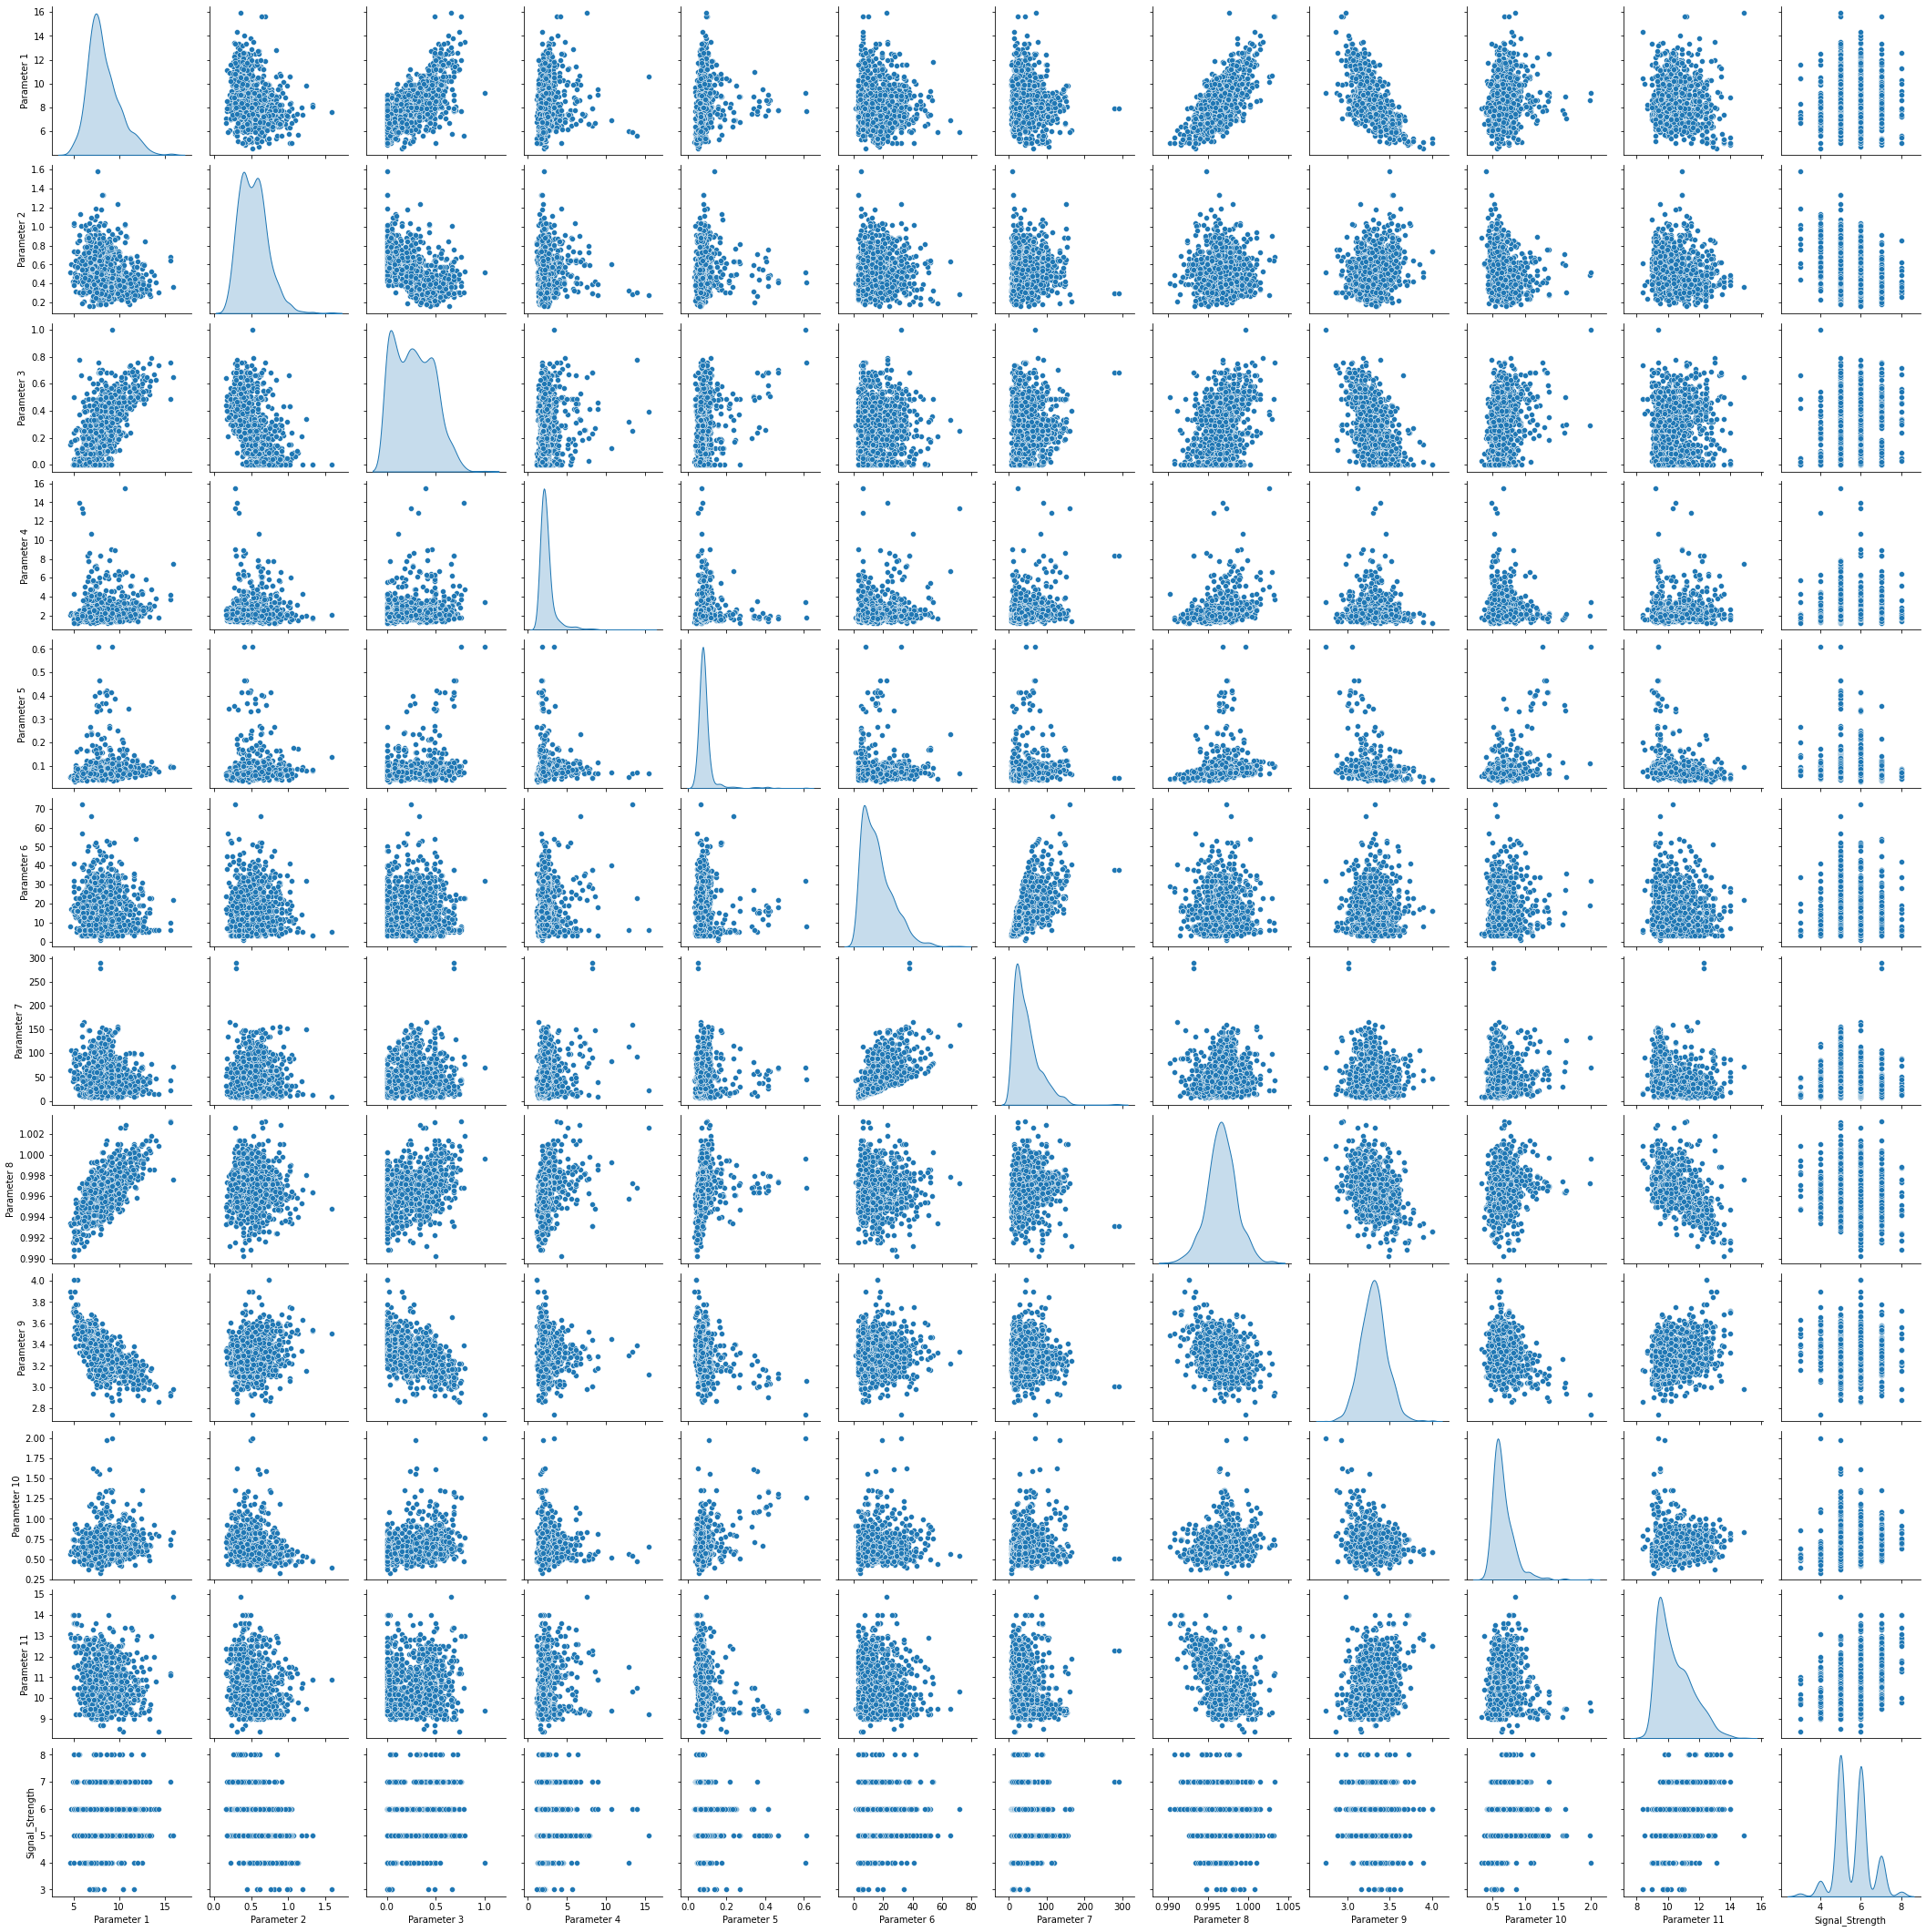

In [20]:
sns.pairplot(signal_df,diag_kind='kde')
plt.show()

In [21]:
signal_df.corr()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  \
Parameter 1         1.000000    -0.255646     0.661276     0.109990   
Parameter 2        -0.255646     1.000000    -0.551735    -0.008420   
Parameter 3         0.661276    -0.551735     1.000000     0.147385   
Parameter 4         0.109990    -0.008420     0.147385     1.000000   
Parameter 5         0.078047     0.047435     0.217638    -0.011715   
Parameter 6        -0.120918    -0.035168    -0.026417     0.115296   
Parameter 7        -0.087440     0.066319     0.065436     0.199609   
Parameter 8         0.674735     0.026450     0.349051     0.277709   
Parameter 9        -0.689535     0.260102    -0.557196    -0.083095   
Parameter 10        0.204315    -0.257381     0.350256    -0.035341   
Parameter 11       -0.059456    -0.193918     0.101647     0.096543   
Signal_Strength     0.110252    -0.404703     0.232096     0.011320   

                 Parameter 5  Parameter 6  Parameter 7  Parameter 8  \
Parameter 1         0.078047    -0.120918    -0.087440     0.674735   
Parameter 2         0.047435    -0.035168     0.066319     0.026450   
Parameter 3         0.217638    -0.026417     0.065436     0.349051   
Parameter 4        -0.011715     0.115296     0.199609     0.277709   
Parameter 5         1.000000    -0.006072     0.044126     0.187093   
Parameter 6        -0.006072     1.000000     0.666236    -0.014645   
Parameter 7         0.044126     0.666236     1.000000     0.089179   
Parameter 8         0.187093    -0.014645     0.089179     1.000000   
Parameter 9        -0.279146     0.038135    -0.099293    -0.375571   
Parameter 10        0.423228     0.056657     0.023671     0.145625   
Parameter 11       -0.226222    -0.092100    -0.231850    -0.516352   
Signal_Strength    -0.132698    -0.048660    -0.168829    -0.199894   

                 Parameter 9  Parameter 10  Parameter 11  Signal_Strength  
Parameter 1        -0.689535      0.204315     -0.059456         0.110252  
Parameter 2         0.260102     -0.257381     -0.193918        -0.404703  
Parameter 3        -0.557196      0.350256      0.101647         0.232096  
Parameter 4        -0.083095     -0.035341      0.096543         0.011320  
Parameter 5        -0.279146      0.423228     -0.226222        -0.132698  
Parameter 6         0.038135      0.056657     -0.092100        -0.048660  
Parameter 7        -0.099293      0.023671     -0.231850        -0.168829  
Parameter 8        -0.375571      0.145625     -0.516352        -0.199894  
Parameter 9         1.000000     -0.235857      0.222830        -0.048678  
Parameter 10       -0.235857      1.000000      0.091088         0.249791  
Parameter 11        0.222830      0.091088      1.000000         0.486878  
Signal_Strength    -0.048678      0.249791      0.486878         1.000000

<AxesSubplot:title={'center':'Pearson correlation of attributes'}>

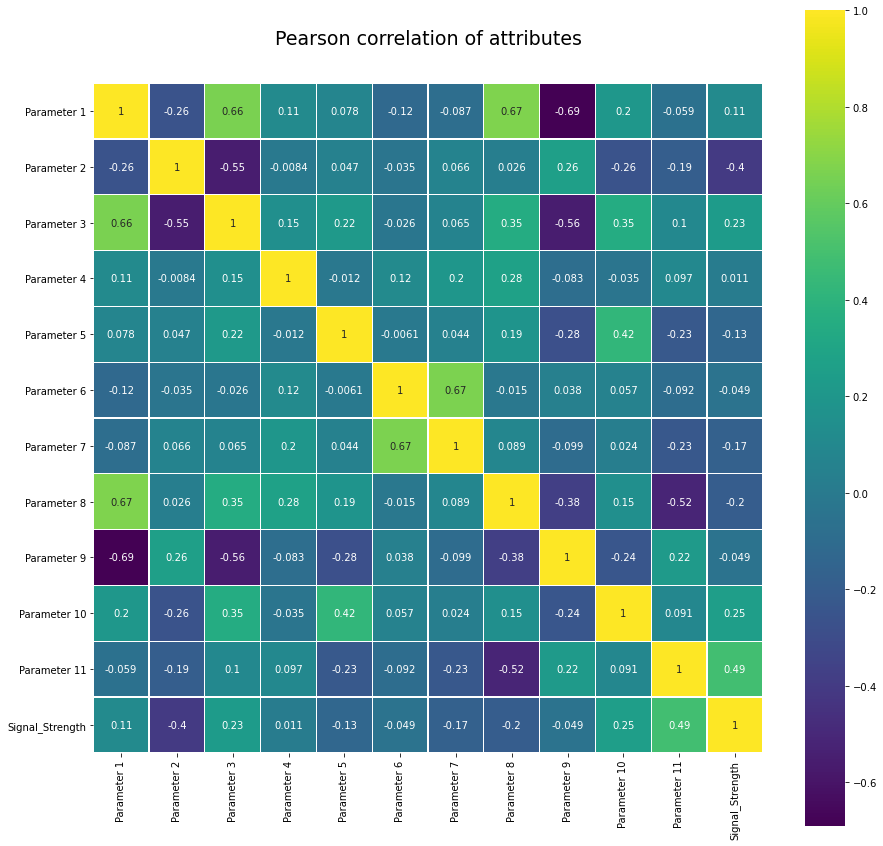

In [22]:
colormap=plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title("Pearson correlation of attributes",y=1.05,size=19)
sns.heatmap(signal_df.corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,linecolor='white',annot=True)

In [23]:
X=signal_df.drop('Signal_Strength',axis=1)
y=signal_df['Signal_Strength']

In [24]:
import random
seed=7
np.random.seed(seed)

In [25]:
#Splitting to create testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=seed)

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [27]:
#We train the model with 797 and 11 columns 
print(X_train.shape)
print(y_train.shape)

(797, 11)
(797,)


In [28]:
print(X_test.shape)
print(y_test.shape)

(342, 11)
(342,)


Build the model
The Sequential model is a linear stack of layers.
The model needs to know what input shape it should expect. For this reason, the first layer in a Sequential model (and only the first, because following layers can do automatic shape inference) needs to receive information about its input shape.
You can also simply add layers via the .add() method

In [29]:
model1 = tf.keras.models.Sequential([
   tf.keras.layers.BatchNormalization(input_shape=(11,)),
         tf.keras.layers.Dense(1)
])

Compile the model
Here we configure the model for training
We will specify an optimizer and a loss function

In [30]:
model1.compile(optimizer='sgd', loss='mean_squared_error')

Fit the model
.fit() trains the model for a fixed number of epochs (iterations on a dataset)
An epoch is an iteration over the entire x and y data provided

In [31]:
model1.fit(X_train, y_train, epochs=10,validation_split=0.35,batch_size=10)

Epoch 1/10
52/52 [==============================] - 2s 5ms/step - loss: 6.8226 - val_loss: 1.7850
Epoch 2/10
52/52 [==============================] - 0s 2ms/step - loss: 1.2680 - val_loss: 1.1513
Epoch 3/10
52/52 [==============================] - 0s 2ms/step - loss: 0.8850 - val_loss: 0.9076
Epoch 4/10
52/52 [==============================] - 0s 2ms/step - loss: 0.7075 - val_loss: 0.7551
Epoch 5/10
52/52 [==============================] - 0s 2ms/step - loss: 0.6368 - val_loss: 0.6538
Epoch 6/10
52/52 [==============================] - 0s 1ms/step - loss: 0.5551 - val_loss: 0.6145
Epoch 7/10
52/52 [==============================] - 0s 2ms/step - loss: 0.5366 - val_loss: 0.5766
Epoch 8/10
52/52 [==============================] - 0s 2ms/step - loss: 0.5166 - val_loss: 0.5469
Epoch 9/10
52/52 [==============================] - 0s 3ms/step - loss: 0.4954 - val_loss: 0.5222
Epoch 10/10
52/52 [==============================] - 0s 3ms/step - loss: 0.4932 - val_loss: 0.5370


In [32]:
y_pred1=model1.predict(X_test)
print(y_pred1)

[[4.9235826]
 [5.315725 ]
 [6.385644 ]
 [5.925674 ]
 [5.186543 ]
 [5.949619 ]
 [5.9491086]
 [5.3629622]
 [5.175948 ]
 [6.0066247]
 [5.787002 ]
 [6.2319746]
 [4.9558916]
 [5.9192486]
 [6.4592395]
 [5.4283094]
 [6.0508366]
 [5.979133 ]
 [5.407577 ]
 [5.3198376]
 [6.0106664]
 [4.782622 ]
 [5.2055955]
 [5.607415 ]
 [6.671826 ]
 [5.8796315]
 [6.5888667]
 [6.452052 ]
 [5.811829 ]
 [5.1232433]
 [6.3707633]
 [5.7550416]
 [5.7756677]
 [5.6831384]
 [5.2292905]
 [6.3212113]
 [5.514682 ]
 [4.7188215]
 [5.118654 ]
 [5.724458 ]
 [6.6650496]
 [4.9237843]
 [5.3939013]
 [6.2624044]
 [5.0164304]
 [5.8978834]
 [5.3784575]
 [5.1604013]
 [5.2083635]
 [5.8839803]
 [5.6155677]
 [5.8325257]
 [6.361382 ]
 [5.5076566]
 [4.323933 ]
 [5.769305 ]
 [5.477644 ]
 [5.520478 ]
 [5.321566 ]
 [6.805612 ]
 [5.0377603]
 [5.5850463]
 [6.657552 ]
 [6.147836 ]
 [6.2572722]
 [6.2537103]
 [6.507216 ]
 [6.707771 ]
 [4.981453 ]
 [5.0556064]
 [5.297942 ]
 [6.4177837]
 [5.0876927]
 [5.526197 ]
 [5.7100034]
 [5.0475945]
 [5.2497597]

In [33]:
train_score1=model1.evaluate(X_train,y_train,verbose=0)
print(train_score1)

0.48156461119651794


In [34]:
test_score1=model1.evaluate(X_test,y_test,verbose=0)
print(test_score1)

0.5105571746826172


In [35]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 11)               44        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1)                 12        
                                                                 
Total params: 56
Trainable params: 34
Non-trainable params: 22
_________________________________________________________________


In [36]:
#Model 2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense

model2=Sequential()
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=12))

In [37]:
model2.compile(optimizer='sgd',loss='mean_squared_error')

In [38]:
model2.fit(X_train,y_train, epochs=10, validation_split=0.35,batch_size=10)

Epoch 1/10
52/52 [==============================] - 1s 4ms/step - loss: 28.4286 - val_loss: 24.2908
Epoch 2/10
52/52 [==============================] - 0s 2ms/step - loss: 22.0732 - val_loss: 19.3046
Epoch 3/10
52/52 [==============================] - 0s 2ms/step - loss: 17.3293 - val_loss: 15.2388
Epoch 4/10
52/52 [==============================] - 0s 2ms/step - loss: 13.3105 - val_loss: 11.5694
Epoch 5/10
52/52 [==============================] - 0s 2ms/step - loss: 9.8905 - val_loss: 8.3930
Epoch 6/10
52/52 [==============================] - 0s 2ms/step - loss: 7.1056 - val_loss: 5.9649
Epoch 7/10
52/52 [==============================] - 0s 2ms/step - loss: 5.0970 - val_loss: 4.2806
Epoch 8/10
52/52 [==============================] - 0s 2ms/step - loss: 3.6967 - val_loss: 3.1289
Epoch 9/10
52/52 [==============================] - 0s 2ms/step - loss: 2.7266 - val_loss: 2.3295
Epoch 10/10
52/52 [==============================] - 0s 2ms/step - loss: 2.0488 - val_loss: 1.7723


In [39]:
y_pred2=model2.predict(X_test)
print(y_pred2)

[[4.103519  4.1614637 4.1389227 3.9643795 4.1222625 4.028431 ]
 [4.180495  4.3207936 4.189094  4.083565  4.1293917 4.0301685]
 [5.366448  5.377777  5.4339476 5.3124695 5.407106  5.328363 ]
 ...
 [5.1163673 5.1604958 5.092366  5.1111326 5.1993294 5.070786 ]
 [4.6816216 4.734727  4.849211  4.671721  4.764799  4.7435703]
 [5.442684  5.568285  5.4844766 5.3264475 5.446414  5.3017564]]


In [40]:
train_score2=model2.evaluate(X_train,y_train,verbose=0)
print(train_score2)

1.7713035345077515


In [41]:
test_score2=model2.evaluate(X_test,y_test,verbose=0)
print(test_score2)

1.8804302215576172


In [42]:
models=pd.DataFrame({'Model':['NN with batchnormalisation','NN with sgm'],
                     'Training Accuracy':[train_score1,train_score2],
                    'Testing Accuracy':[test_score1,test_score2]
                    })
models.sort_index()

Model  Training Accuracy  Testing Accuracy
0  NN with batchnormalisation           0.481565          0.510557
1                 NN with sgm           1.771304          1.880430

### 4. Pickle the model for future use.

In [43]:
!pip install pyyaml h5py

In [44]:
#Save the model
model1.save('model_reg.h5')
print('Model Saved!')

Model Saved!


In [45]:
#load the model
model_rr=load_model('model_reg.h5')

## • PROJECT OBJECTIVE: We will build a digit classifier on the SVHN (Street View Housing Number) dataset

### 1. Import the data.

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.models import load_model

import warnings
warnings.filterwarnings("ignore")

In [47]:
import h5py
digi_df=h5py.File('Part - 4 - Autonomous_Vehicles_SVHN_single_grey1 (1).h5','r')
digi_df.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

### 2. Data pre-processing and visualisation.¶

In [48]:
X_train=digi_df['X_train'][:]
print('X_train:',X_train.shape)

X_train: (42000, 32, 32)


In [49]:
y_train=digi_df['y_train'][:]
print('y_train:',y_train.shape)

y_train: (42000,)


In [50]:
X_test=digi_df['X_test'][:]
print('X_test:',X_test.shape)

X_test: (18000, 32, 32)


In [51]:
y_test=digi_df['y_test'][:]
print('y_test:',y_test.shape)

y_test: (18000,)


In [52]:
X_val=digi_df['X_val'][:]
print('X_val:',X_val.shape)

X_val: (60000, 32, 32)


In [53]:
y_val=digi_df['y_val'][:]
print('y_val:',y_val.shape)

y_val: (60000,)


In [54]:
def visu_ds(data_set):
    fig=plt.figure(figsize=(10,10))
    rows=10
    columns=10
    wid=10
    hei=10
    
    for i in range(1,rows*columns+1):
        img=data_set[i]
        fig.add_subplot(rows,columns,i)
        plt.imshow(img,cmap='gray')
        plt.show()

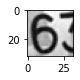

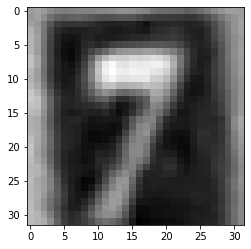

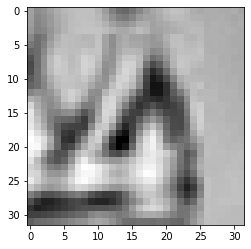

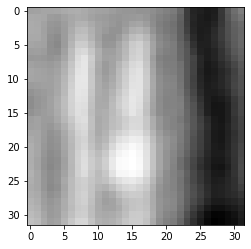

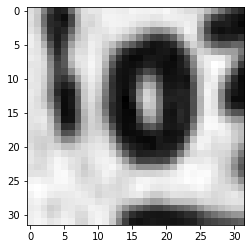

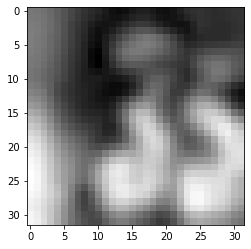

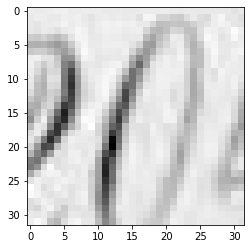

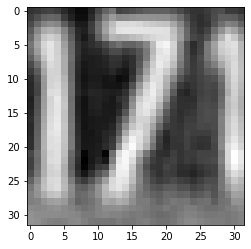

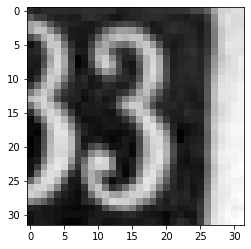

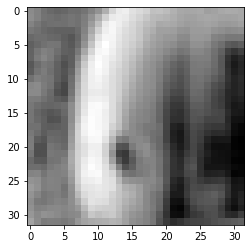

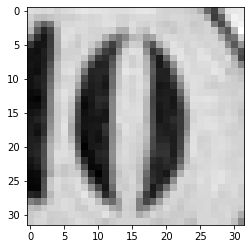

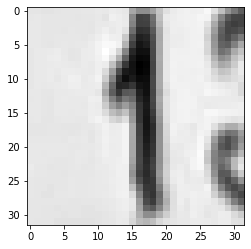

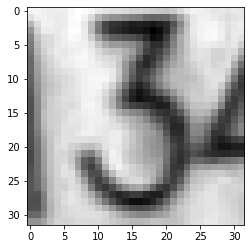

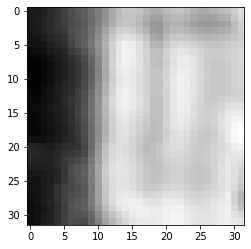

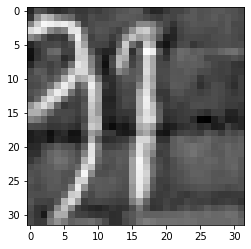

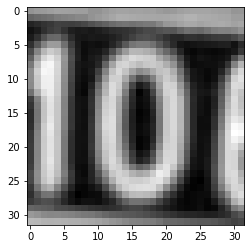

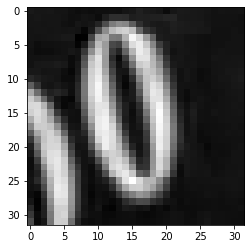

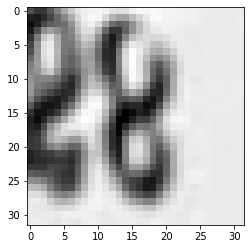

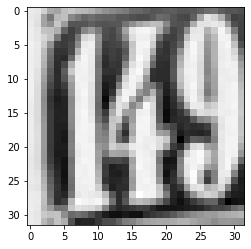

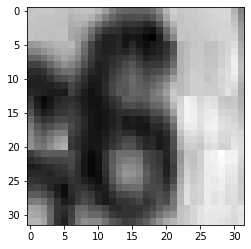

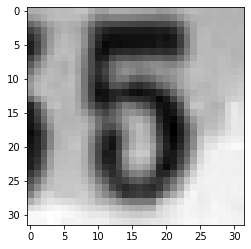

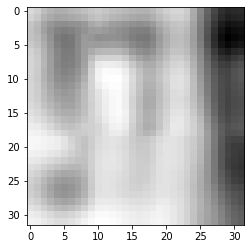

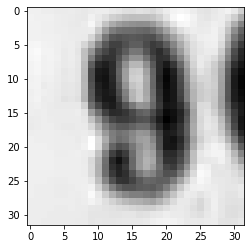

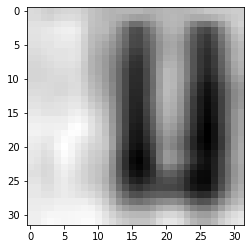

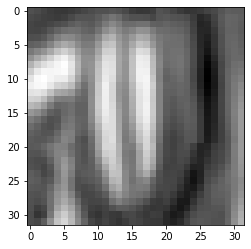

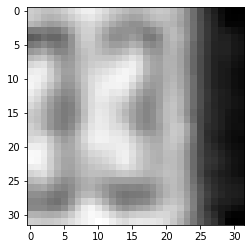

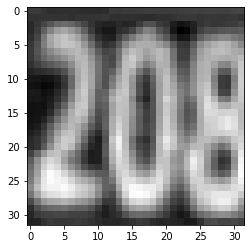

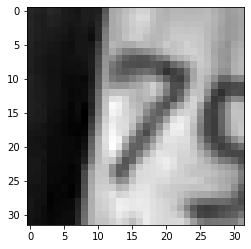

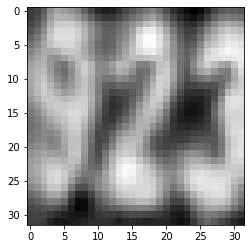

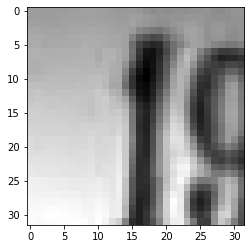

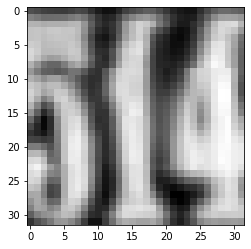

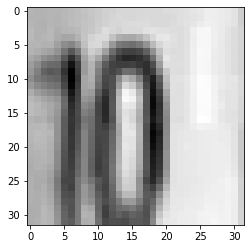

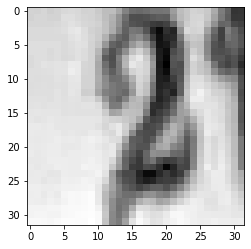

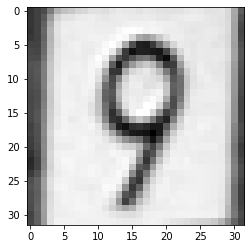

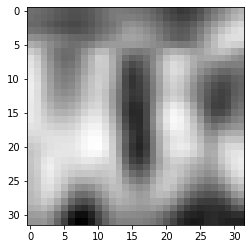

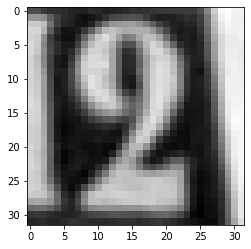

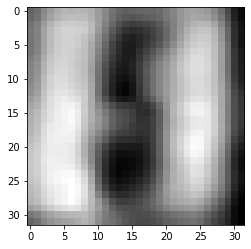

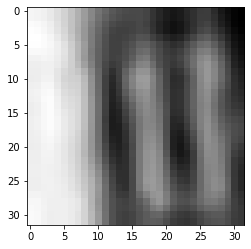

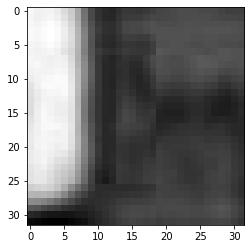

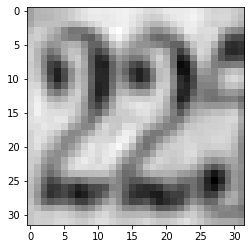

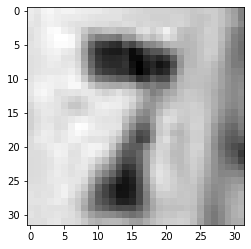

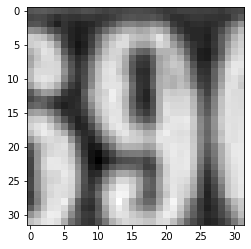

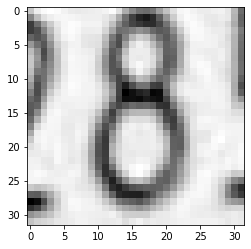

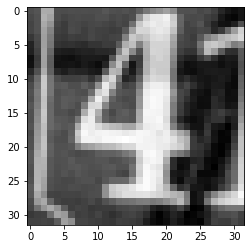

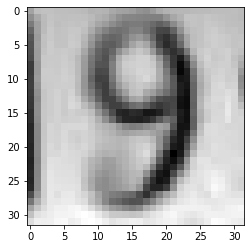

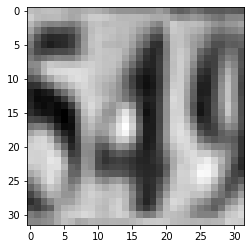

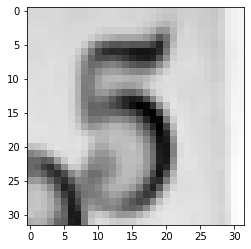

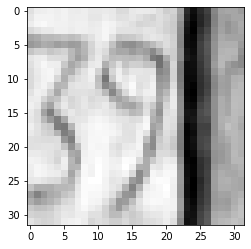

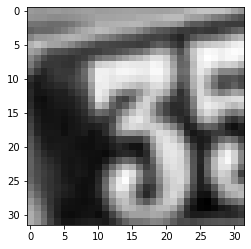

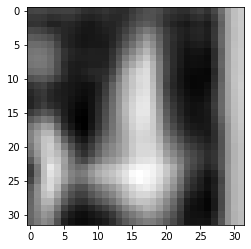

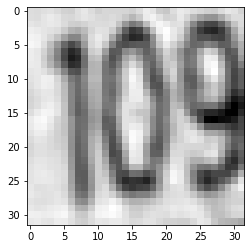

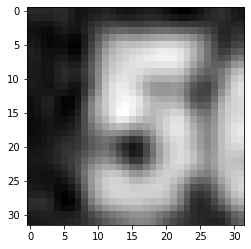

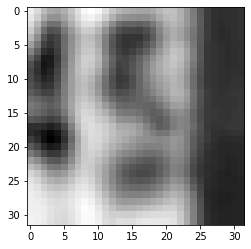

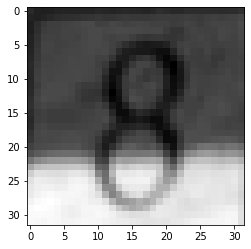

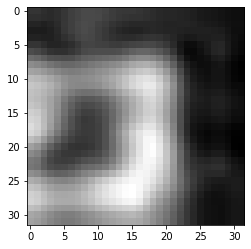

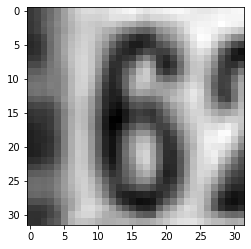

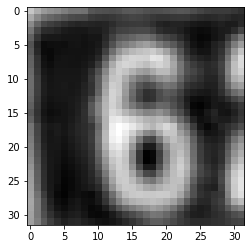

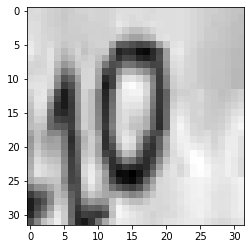

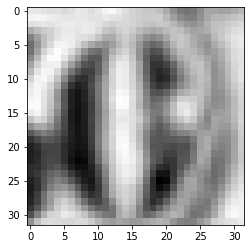

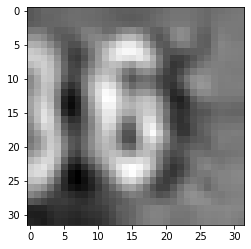

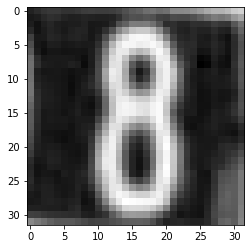

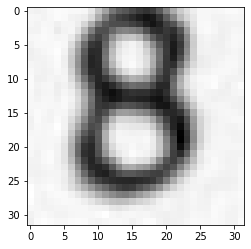

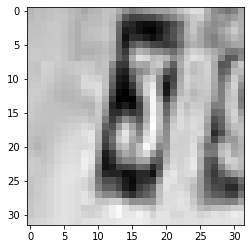

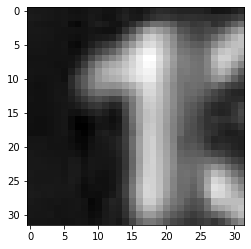

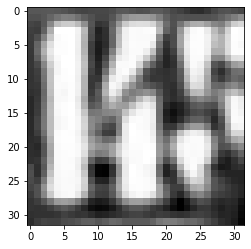

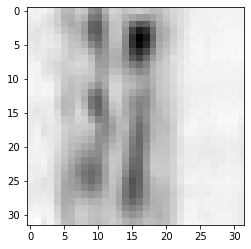

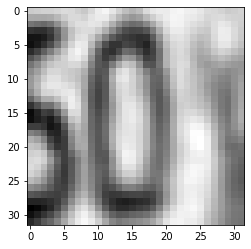

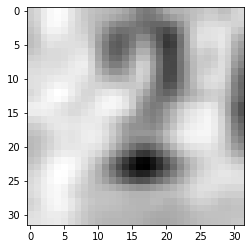

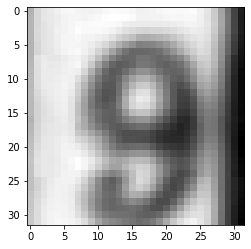

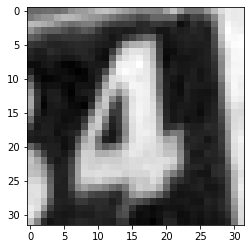

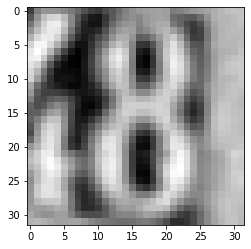

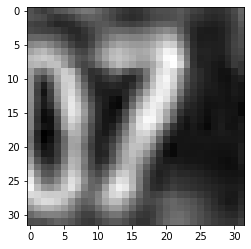

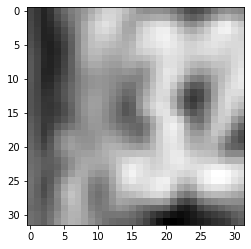

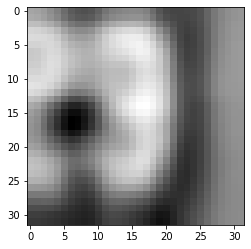

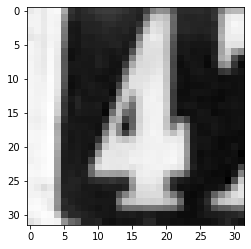

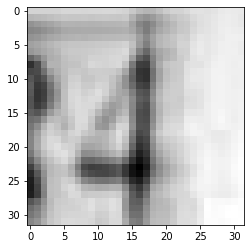

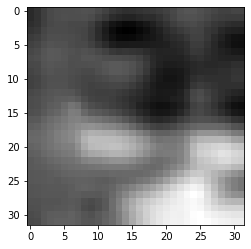

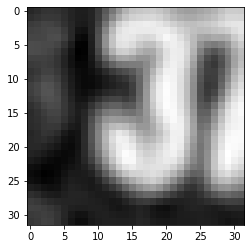

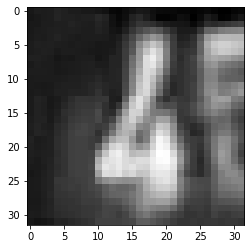

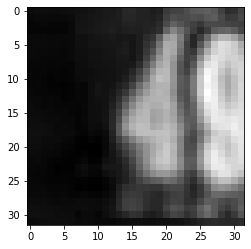

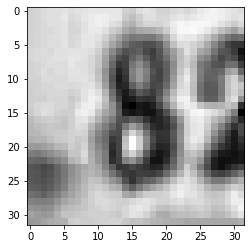

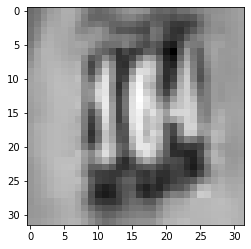

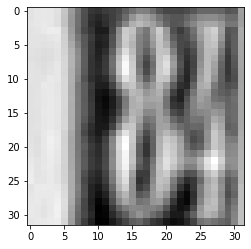

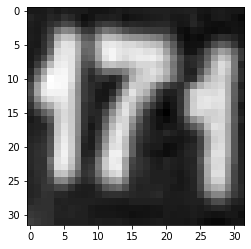

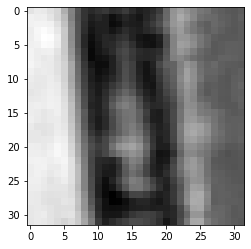

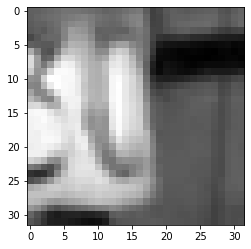

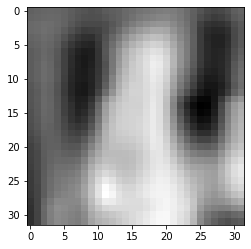

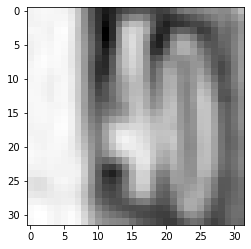

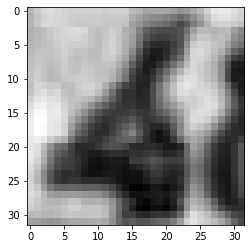

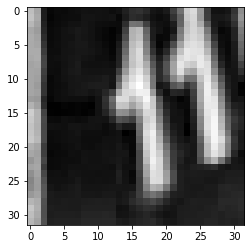

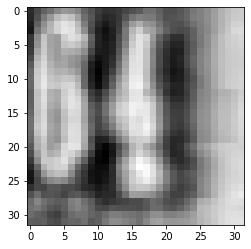

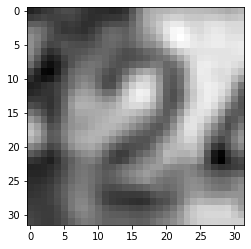

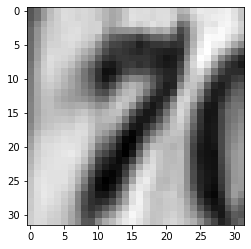

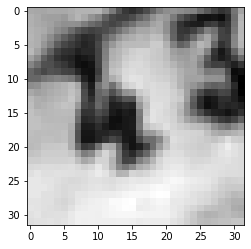

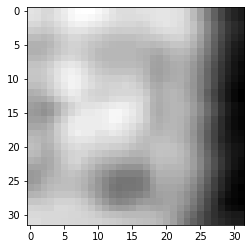

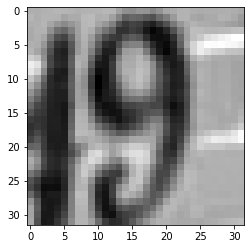

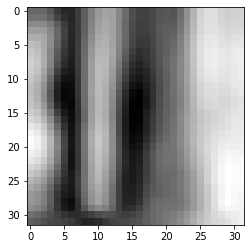

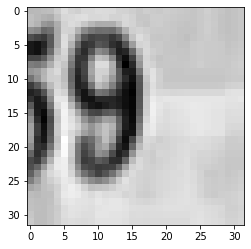

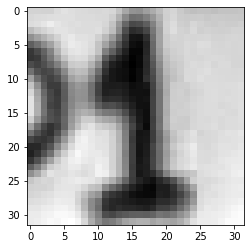

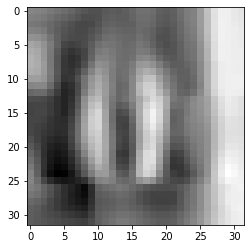

In [55]:
visu_ds(X_train)

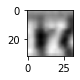

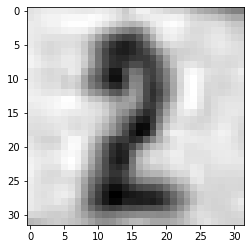

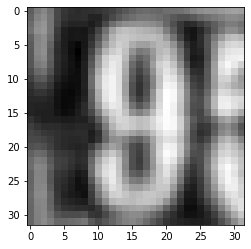

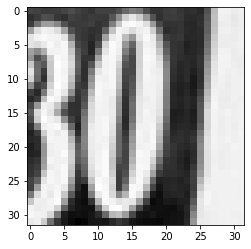

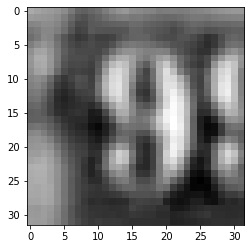

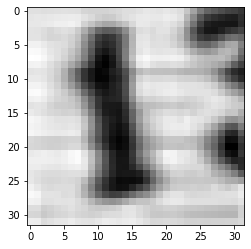

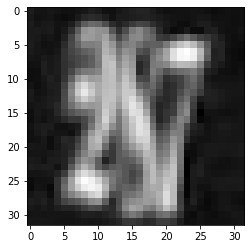

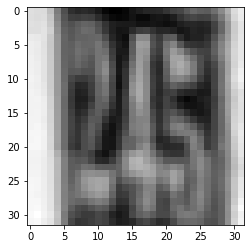

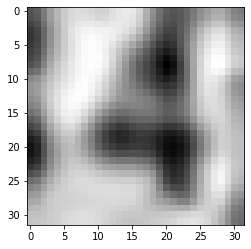

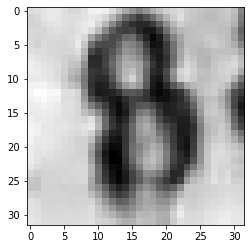

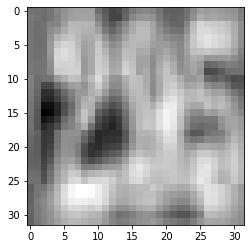

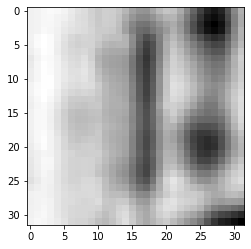

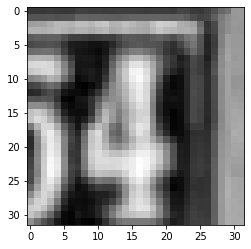

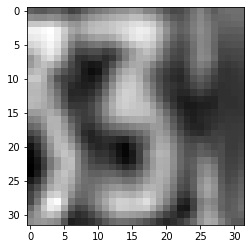

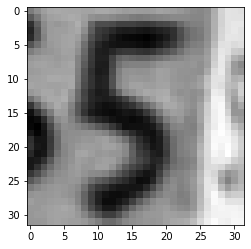

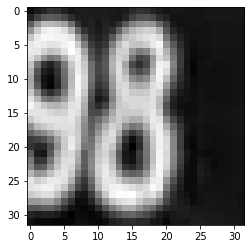

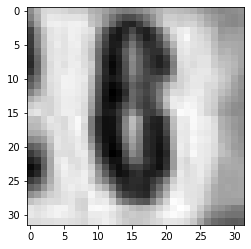

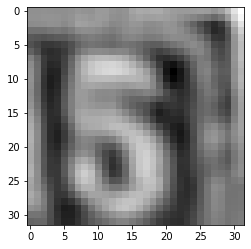

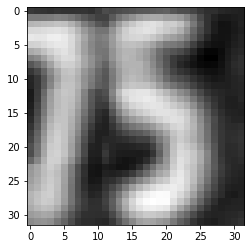

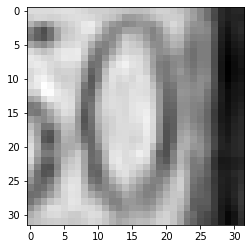

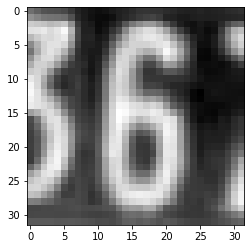

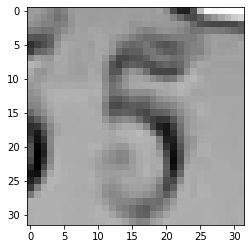

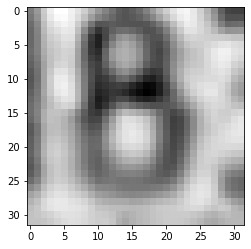

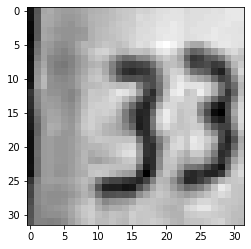

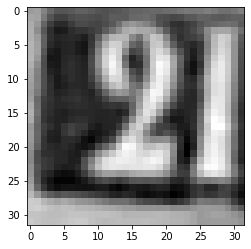

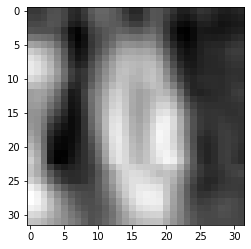

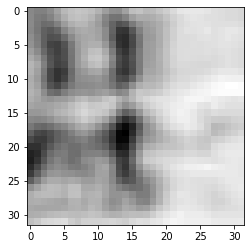

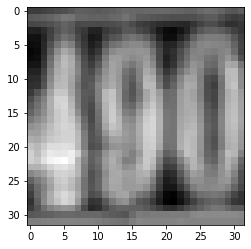

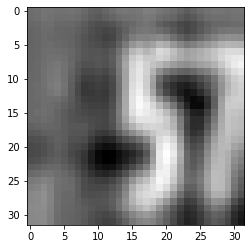

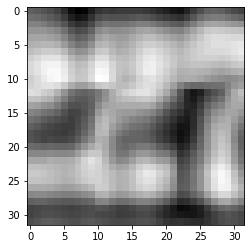

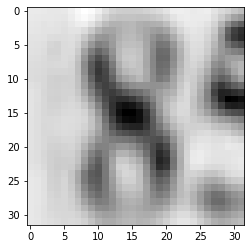

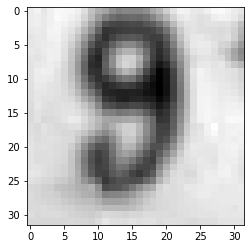

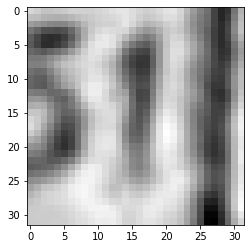

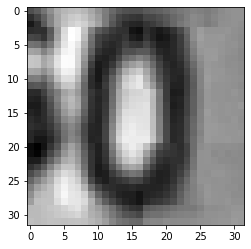

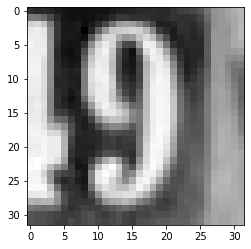

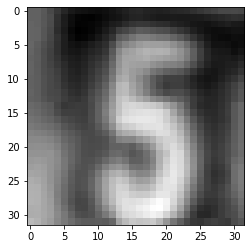

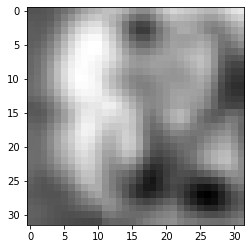

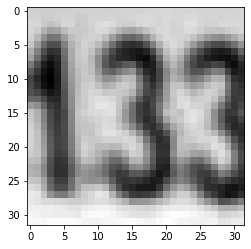

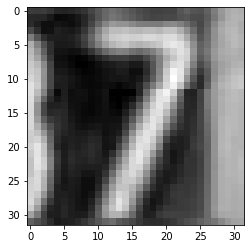

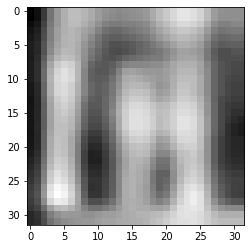

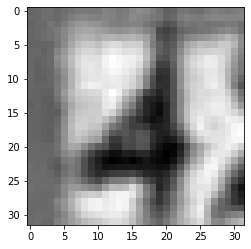

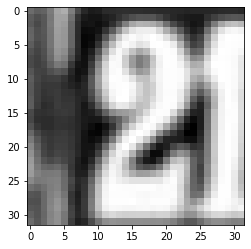

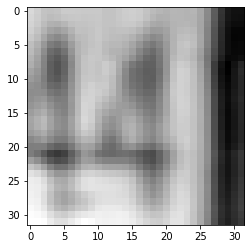

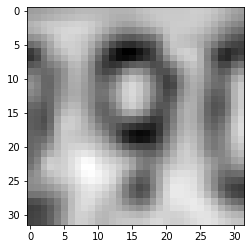

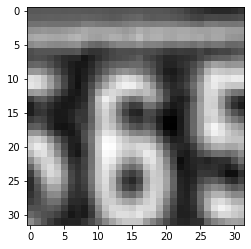

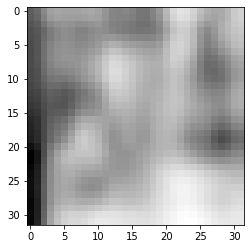

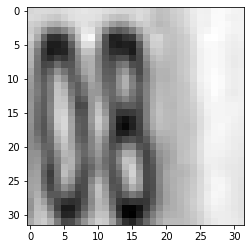

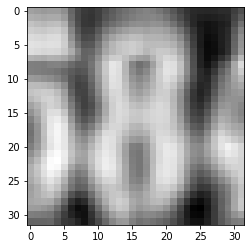

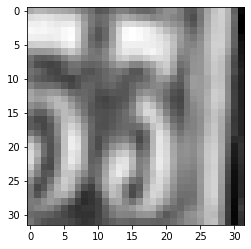

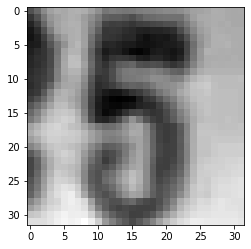

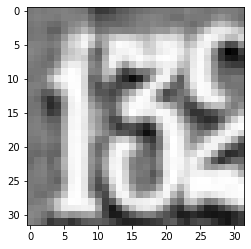

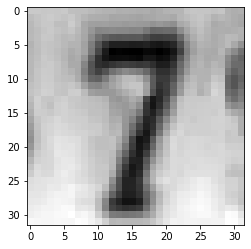

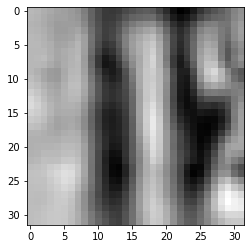

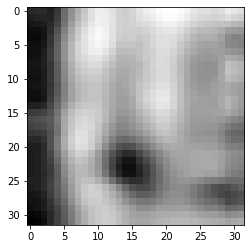

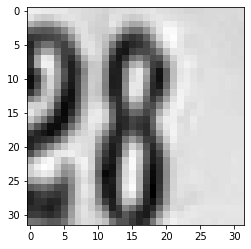

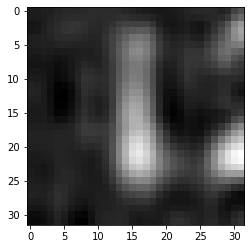

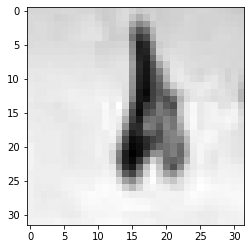

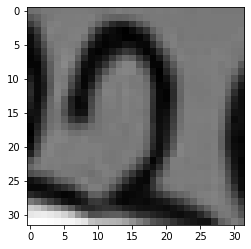

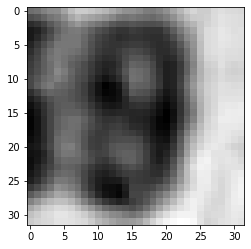

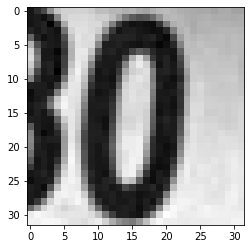

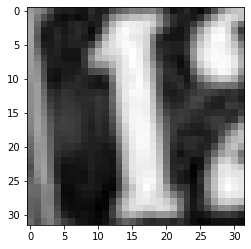

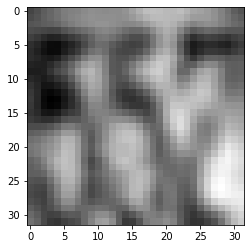

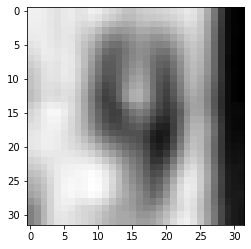

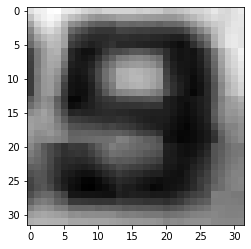

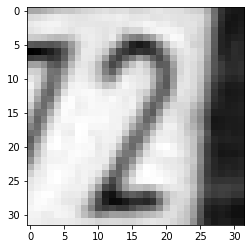

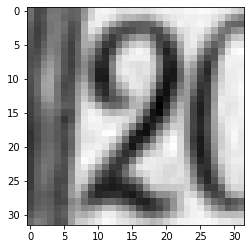

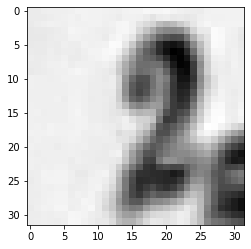

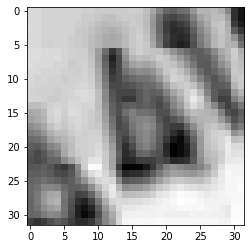

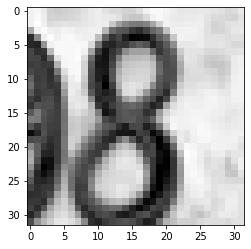

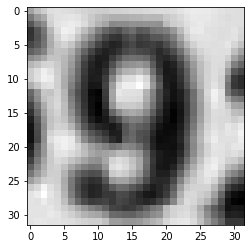

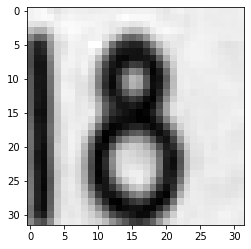

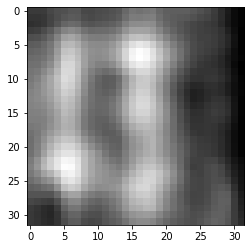

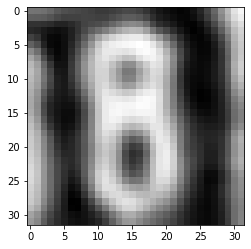

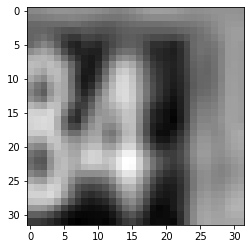

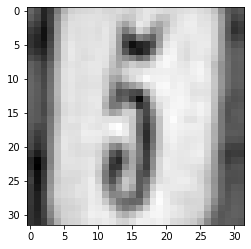

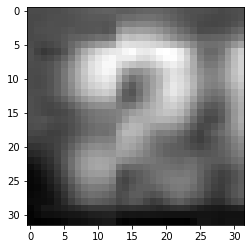

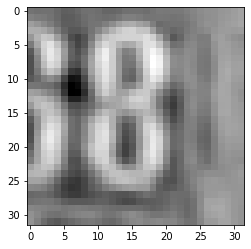

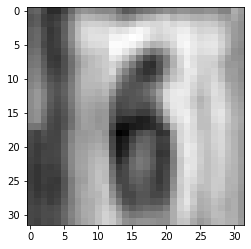

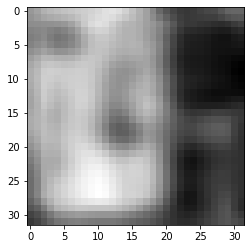

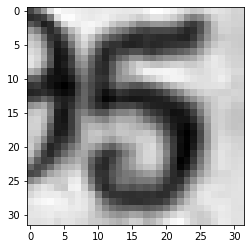

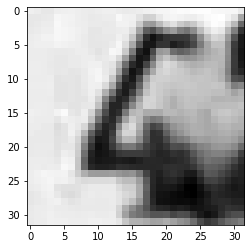

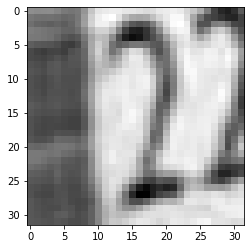

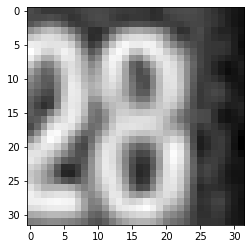

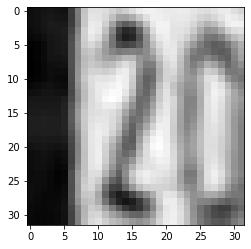

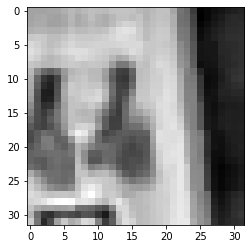

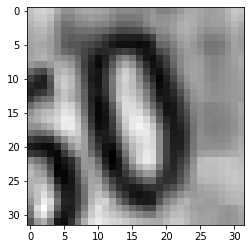

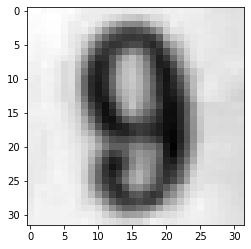

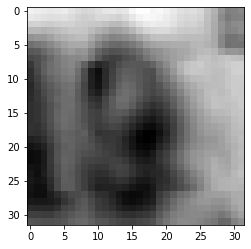

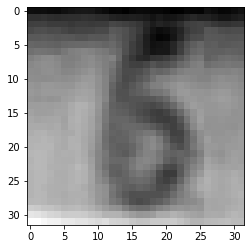

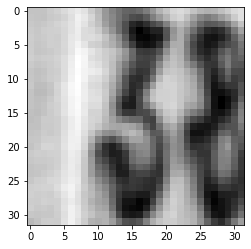

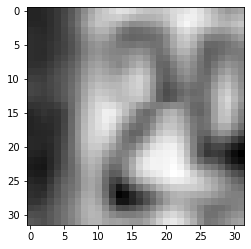

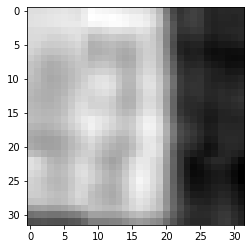

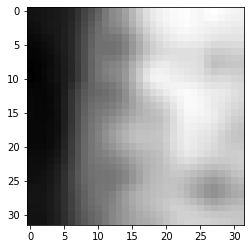

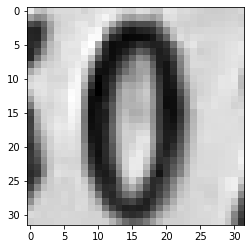

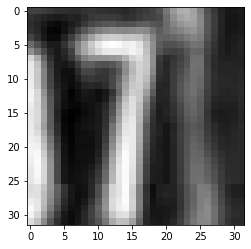

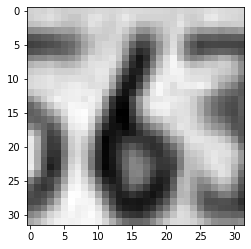

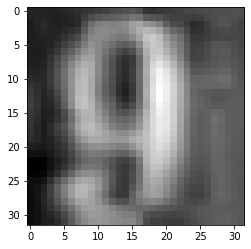

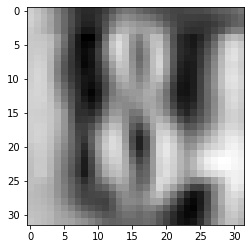

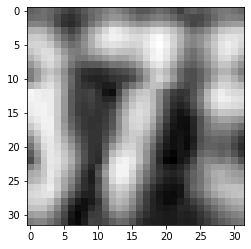

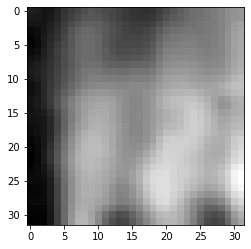

In [56]:
visu_ds(X_test)

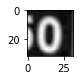

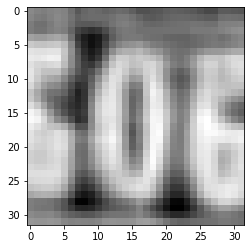

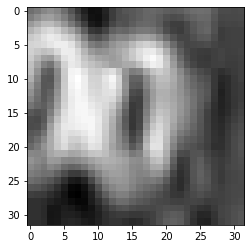

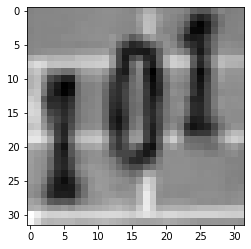

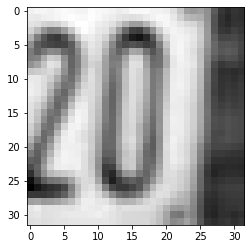

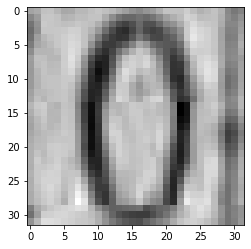

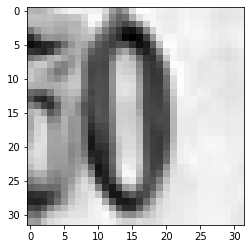

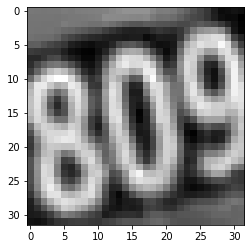

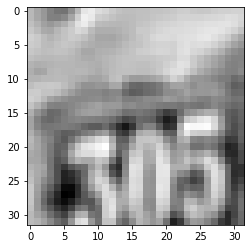

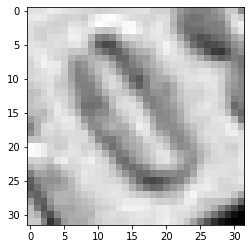

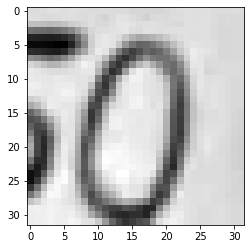

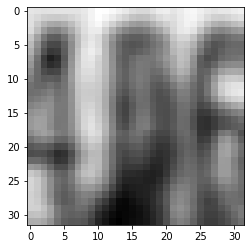

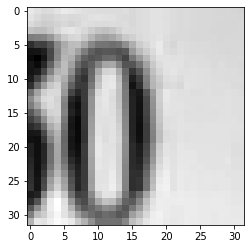

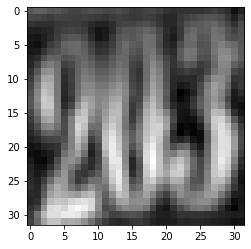

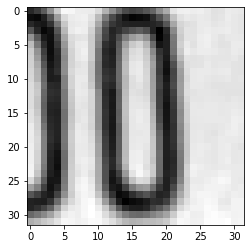

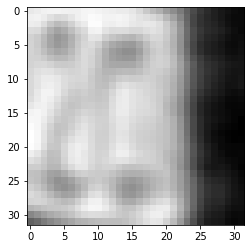

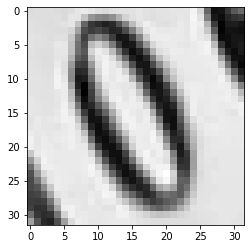

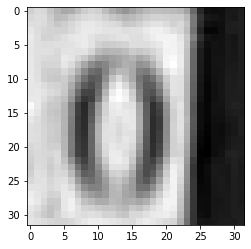

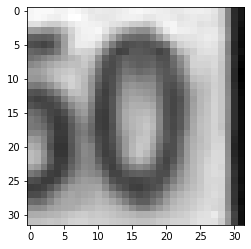

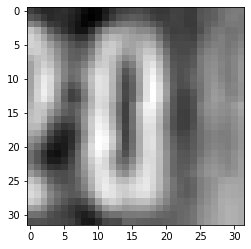

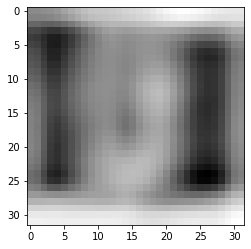

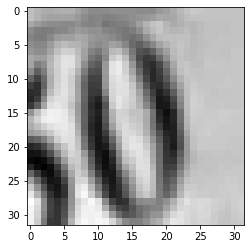

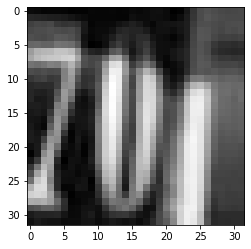

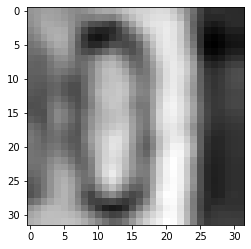

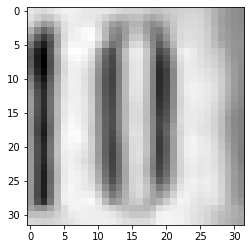

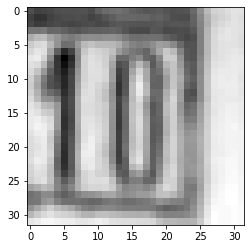

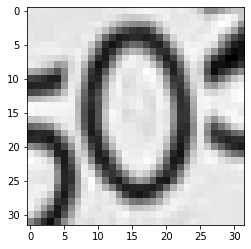

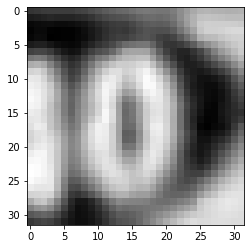

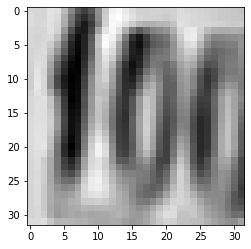

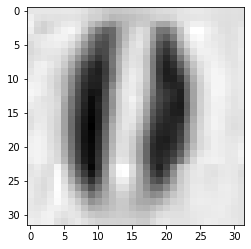

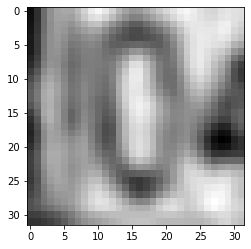

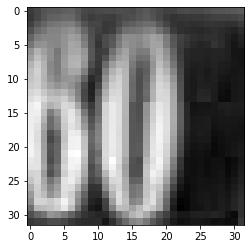

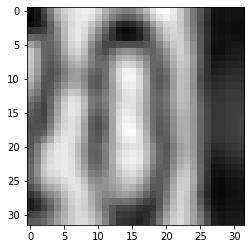

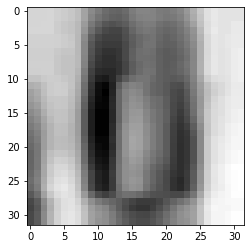

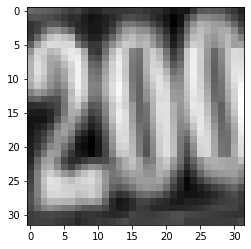

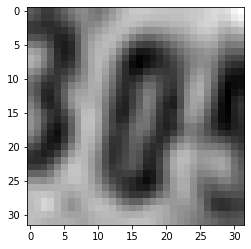

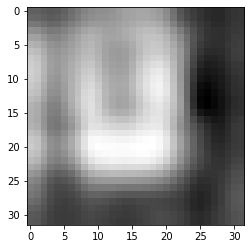

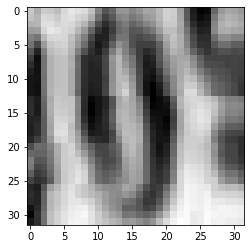

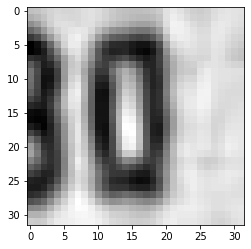

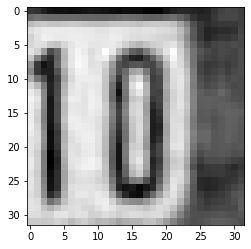

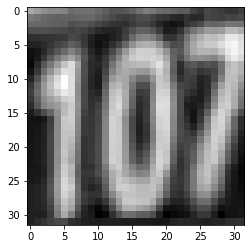

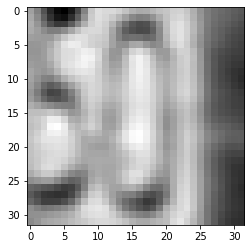

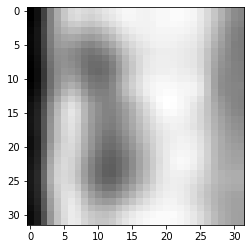

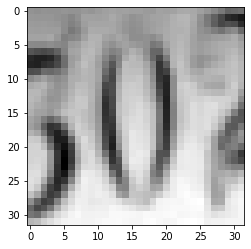

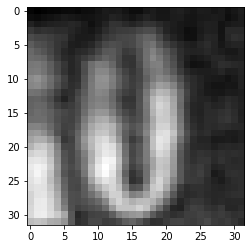

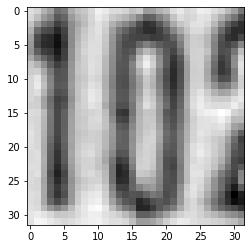

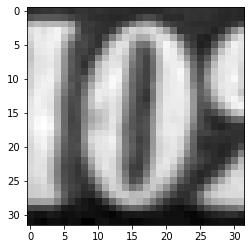

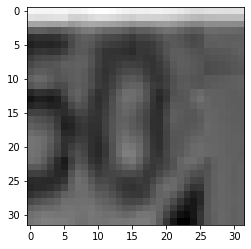

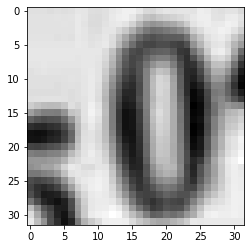

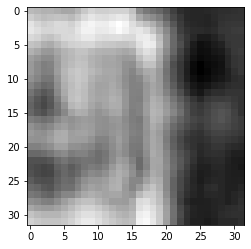

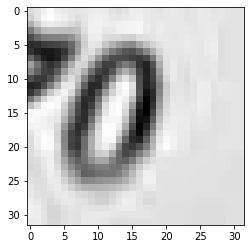

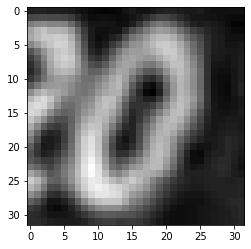

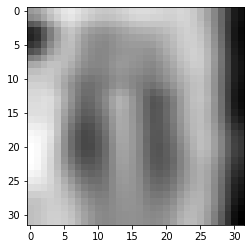

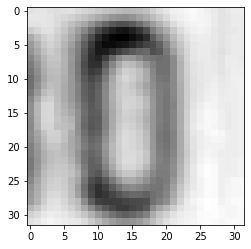

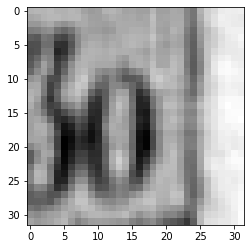

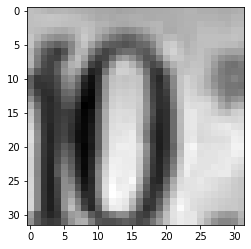

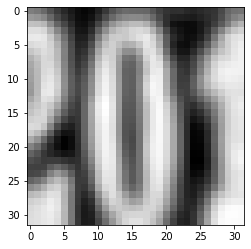

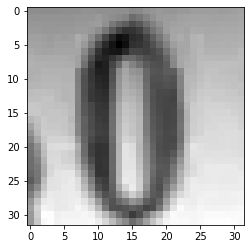

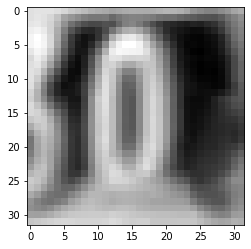

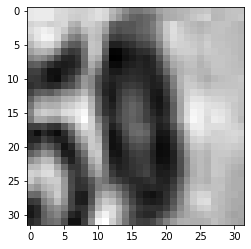

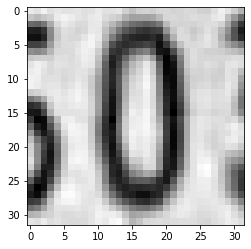

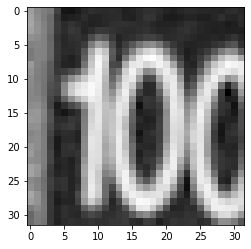

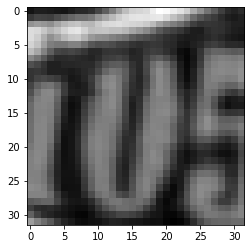

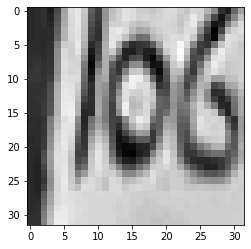

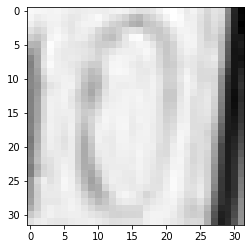

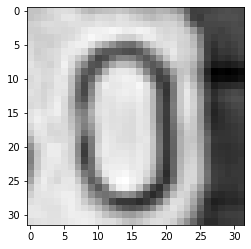

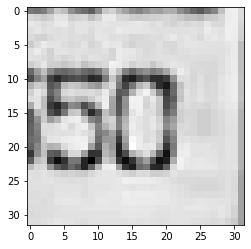

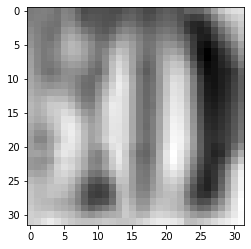

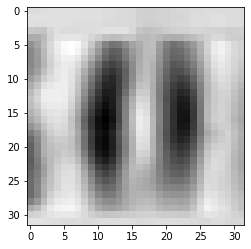

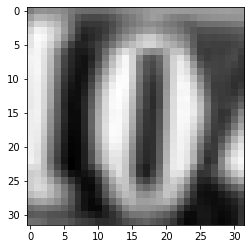

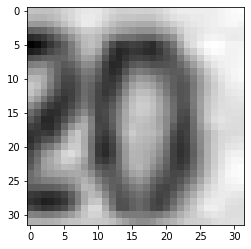

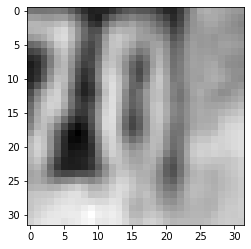

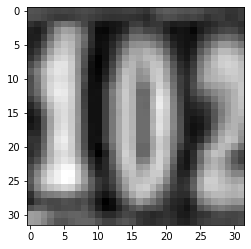

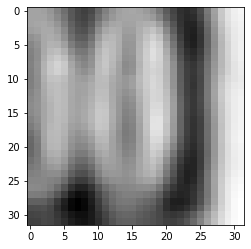

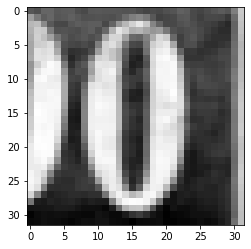

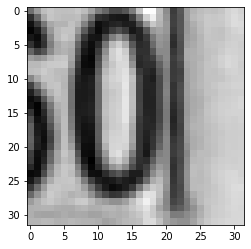

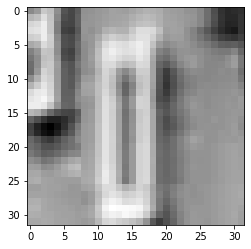

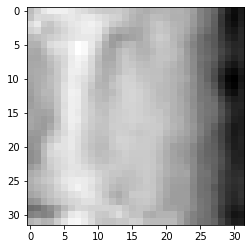

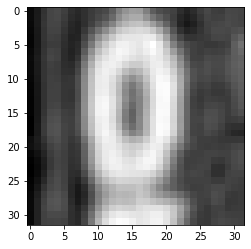

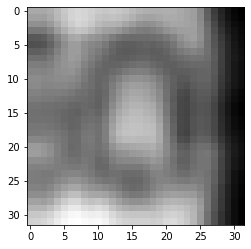

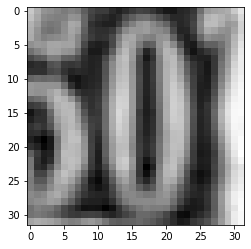

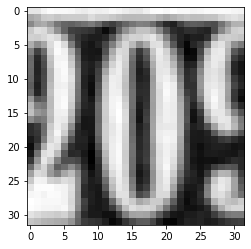

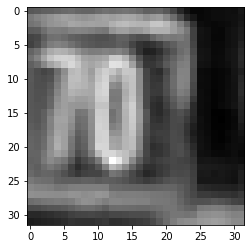

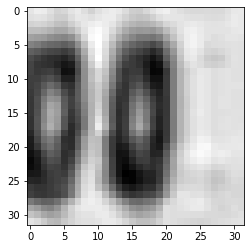

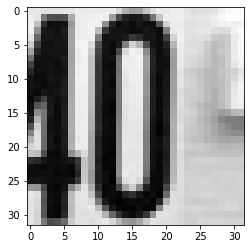

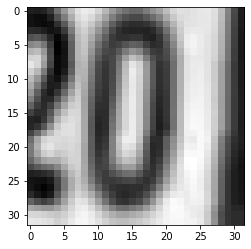

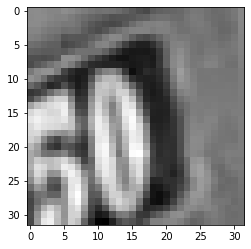

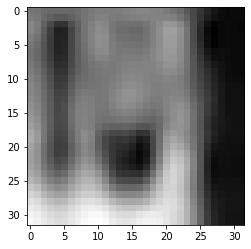

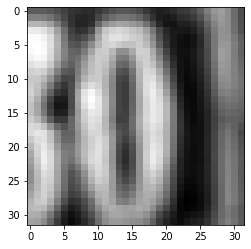

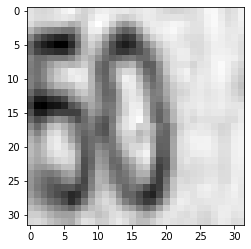

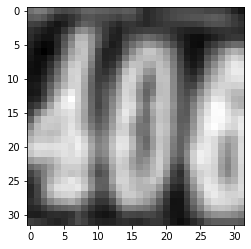

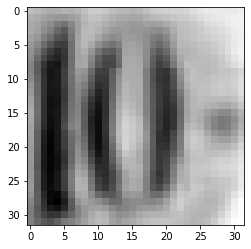

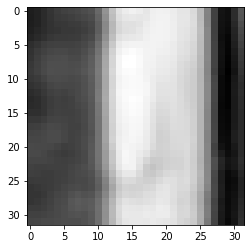

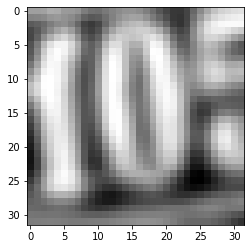

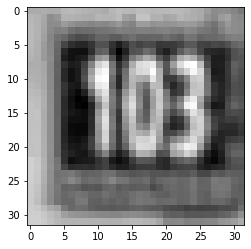

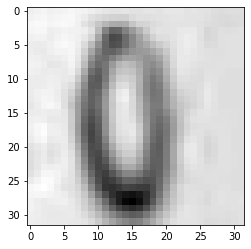

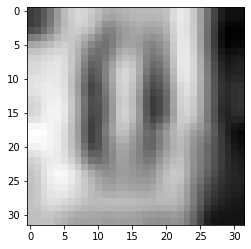

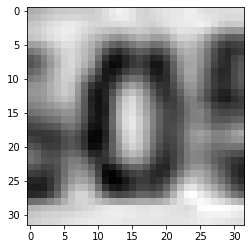

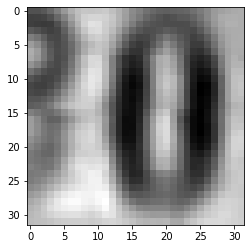

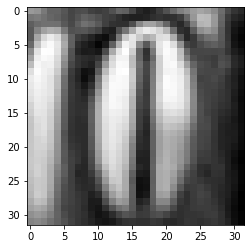

In [57]:
visu_ds(X_val)

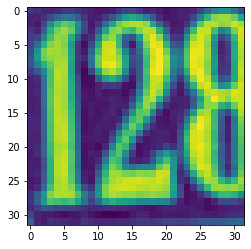

Label: 1


In [58]:
#show first number in the dataset 
plt.imshow(X_train[0])
plt.show()
print('Label:',y_test[0])

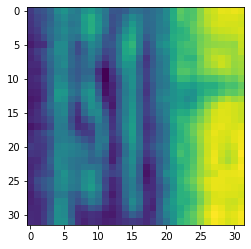

Label: 1


In [59]:
#show first number in the dataset 
plt.imshow(X_test[0])
plt.show()
print('Label:',y_test[0])

Label for the image is : 7


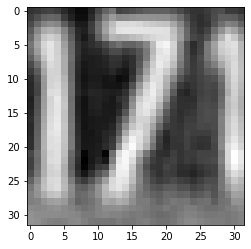

In [60]:
#Label for a particular image in the dataset
plt.imshow(X_train[8],cmap='gray')
print('Label for the image is :',y_train[8])

Label for the image is : 4


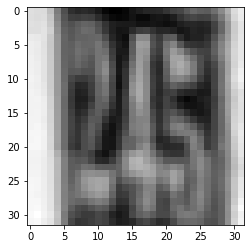

In [61]:
#Label for a particular image in the dataset
plt.imshow(X_test[8],cmap='gray')
print('Label for the image is :',y_test[8])

Label for the image is : 0


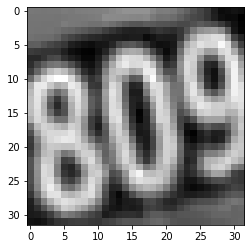

In [62]:
#Label for a particular image in the dataset
plt.imshow(X_val[8],cmap='gray')
print('Label for the image is :',y_val[8])

In [63]:
# reshaping X data: (n, 32, 32) => (n, 1024)
X_train=X_train.reshape((X_train.shape[0],1024))
X_val=X_val.reshape((X_val.shape[0],1024))
X_test=X_test.reshape((X_test.shape[0],1024))

In [64]:
# converting y data into categorical (one-hot encoding)
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [65]:
print('X_train:',X_train.shape)
print('X_val:',X_val.shape)
print('X_test:', X_test.shape)

print('y_train',y_train.shape)
print('y_val',y_val.shape)
print('y_test',y_test.shape)

X_train: (42000, 1024)
X_val: (60000, 1024)
X_test: (18000, 1024)
y_train (42000, 10)
y_val (60000, 10)
y_test (18000, 10)


In [66]:
#Value after one hot encoding
print(y_train[0])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [67]:
#Normalizing the dependent variables in 0,1 range before creating the models
print('Min Value:',X_train.min())
print('Max Value:',X_train.max())

X_train=X_train/255.0
X_test=X_test/255.0
X_val=X_val/255.0

print('\n After Normalization')
print('Min Value:',X_train.min())
print('Max Value:',X_train.max())

Min Value: 0.0
Max Value: 254.9745

 After Normalization
Min Value: 0.0
Max Value: 0.9999


### 3. Design, train, tune and test a neural network image classifier.   Hint: Use best approach to refine and tune the data or the model. Be highly experimental here to get the best accuracy out of the model.

In [68]:
#fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [69]:
#Model1 : NN with adam 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Flatten

#import tensorflow as tf
import tensorflow as tf

#Initialise the sequential model with two hidden layers
model_1=tf.keras.Sequential([
        tf.keras.layers.Dense(64,activation='relu',input_shape=(1024,)), #input and first hidden layer with relu acti. fun
        tf.keras.layers.Dense(32,activation='relu'),  #second hidden layer with relu acti. fun
        tf.keras.layers.Dense(10,activation='softmax') #output layer with softmax activation function
])

In [70]:
#Declare adam optimizer with learning rate of 0.001
adam=optimizers.Adam(learning_rate=0.001)

In [71]:
#Compile the model
model_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [72]:
#fit the model
history_model_1=model_1.fit(X_train,y_train,epochs=10,validation_split=0.2,batch_size=128,verbose=0)

In [73]:
train_results1=model_1.evaluate(X_train,y_train)
print('Train loss: ', train_results1[0])
print('Train accuracy: ', train_results1[1])

1313/1313 [==============================] - 2s 1ms/step - loss: 1.2581 - accuracy: 0.6051
Train loss:  1.258056879043579
Train accuracy:  0.6051190495491028


In [74]:
val_results1=model_1.evaluate(X_val,y_val)
print('Val loss: ', val_results1[0])
print('Val accuracy: ', val_results1[1])

1875/1875 [==============================] - 4s 2ms/step - loss: 1.2581 - accuracy: 0.6053
Val loss:  1.258107304573059
Val accuracy:  0.6053333282470703


In [75]:
test_results1 = model_1.evaluate(X_test, y_test)
print('Test accuracy: ', test_results1[0])
print('Test accuracy: ', test_results1[1])

563/563 [==============================] - 1s 1ms/step - loss: 1.2582 - accuracy: 0.6058
Test accuracy:  1.258223056793213
Test accuracy:  0.6058333516120911


In [76]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                65600     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [77]:
#Model 2: NN with sgd
def create_model2():
    model_two=tf.keras.models.Sequential()
    
    model_two.add(Dense(50,input_shape=(1024,))) #input layer
    model_two.add(Activation('relu'))
    
    model_two.add(Dense(50)) #hidden layer
    model_two.add(Activation('relu'))
    
    model_two.add(Dense(50)) #hidden layer
    model_two.add(Activation('relu'))
    
    model_two.add(Dense(50)) #hidden layer
    model_two.add(Activation('relu'))
    
    model_two.add(Dense(10)) #output layer
    model_two.add(Activation('softmax'))
    
    sgd=optimizers.SGD(lr=0.001)
    model_two.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model_two

In [78]:
model_two=create_model2()
history_model_2=model_two.fit(X_train,y_train,batch_size=100,epochs=10,verbose=0)

In [79]:
train_results2=model_two.evaluate(X_train,y_train)
print('Train loss: ', train_results2[0])
print('Train accuracy: ', train_results2[1])

1313/1313 [==============================] - 2s 2ms/step - loss: 2.2927 - accuracy: 0.1405
Train loss:  2.2927303314208984
Train accuracy:  0.14047619700431824


In [80]:
val_results2=model_two.evaluate(X_val,y_val)
print('Val loss: ', val_results2[0])
print('Val accuracy: ', val_results2[1])

1875/1875 [==============================] - 4s 2ms/step - loss: 2.2929 - accuracy: 0.1389
Val loss:  2.2928693294525146
Val accuracy:  0.13886666297912598


In [81]:
test_results2 = model_two.evaluate(X_test, y_test)
print('Test accuracy: ', test_results2[0])
print('Test accuracy: ', test_results2[1])

563/563 [==============================] - 1s 1ms/step - loss: 2.2932 - accuracy: 0.1351
Test accuracy:  2.2931888103485107
Test accuracy:  0.13511110842227936


In [82]:
model_two.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 50)                51250     
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 50)                2550      
                                                                 
 activation_1 (Activation)   (None, 50)                0         
                                                                 
 dense_7 (Dense)             (None, 50)                2550      
                                                                 
 activation_2 (Activation)   (None, 50)                0         
                                                                 
 dense_8 (Dense)             (None, 50)               

In [83]:
#Model 3: NN with sgd and batchnormalization
def create_batchnor_model():
    model_three=tf.keras.models.Sequential()
    
    model_three.add(Dense(50,input_shape=(1024,))) #input layer
    model_three.add(tf.keras.layers.BatchNormalization())
    model_three.add(Activation('relu'))
    
    model_three.add(Dense(50)) #hidden layer
    model_three.add(tf.keras.layers.BatchNormalization())
    model_three.add(Activation('relu'))
    
    model_three.add(Dense(50)) #hidden layer
    model_three.add(tf.keras.layers.BatchNormalization())
    model_three.add(Activation('relu'))
    
    model_three.add(Dense(50)) #hidden layer
    model_three.add(tf.keras.layers.BatchNormalization())
    model_three.add(Activation('relu'))
    
    model_three.add(Dense(10)) #output layer
    model_three.add(Activation('softmax'))
    
    sgd=optimizers.SGD(lr=0.001)
    model_three.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model_three

In [84]:
model_three=create_batchnor_model()
history_model_3=model_three.fit(X_train,y_train,batch_size=100,epochs=10,verbose=0)

In [85]:
train_results3=model_three.evaluate(X_train,y_train)
print('Train loss: ', train_results3[0])
print('Train accuracy: ', train_results3[1])

1313/1313 [==============================] - 2s 2ms/step - loss: 1.8166 - accuracy: 0.4004
Train loss:  1.816645860671997
Train accuracy:  0.4003571569919586


In [86]:
val_results3=model_three.evaluate(X_val,y_val)
print('Val loss: ', val_results3[0])
print('Val accuracy: ', val_results3[1])

1875/1875 [==============================] - 5s 2ms/step - loss: 1.8224 - accuracy: 0.3975
Val loss:  1.8224338293075562
Val accuracy:  0.3975333273410797


In [87]:
test_results3 = model_three.evaluate(X_test,y_test)
print('Test accuracy: ', test_results3[0])
print('Test accuracy: ', test_results3[1])

563/563 [==============================] - 1s 2ms/step - loss: 1.8359 - accuracy: 0.3909
Test accuracy:  1.8359380960464478
Test accuracy:  0.3909444510936737


In [88]:
model_three.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 50)                51250     
                                                                 
 batch_normalization_1 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 50)                0         
                                                                 
 dense_11 (Dense)            (None, 50)                2550      
                                                                 
 batch_normalization_2 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 50)               

In [89]:
#Model 4:NN with adam,batch normalisation and dropout
def adam2_with_batchnor_model():
    model_four=Sequential()
    model_four.add(Dense(50,input_shape=(1024,),kernel_initializer='he_normal'))
    model_four.add(tf.keras.layers.BatchNormalization())
    model_four.add(Activation('relu'))
    model_four.add(tf.keras.layers.Dropout(0.5))
    
    model_four.add(Dense(50,kernel_initializer='he_normal'))
    model_four.add(tf.keras.layers.BatchNormalization())
    model_four.add(Activation('relu'))
    model_four.add(tf.keras.layers.Dropout(0.5))
    
    model_four.add(Dense(50,kernel_initializer='he_normal'))
    model_four.add(tf.keras.layers.BatchNormalization())
    model_four.add(Activation('relu'))
    model_four.add(tf.keras.layers.Dropout(0.5))
    
    model_four.add(Dense(50,kernel_initializer='he_normal'))
    model_four.add(tf.keras.layers.BatchNormalization())
    model_four.add(Activation('relu'))
    model_four.add(tf.keras.layers.Dropout(0.5))
    
    model_four.add(Dense(10,kernel_initializer='he_normal'))
    model_four.add(Activation('softmax'))
    
    adam=optimizers.Adam(lr=0.01, beta_1=0.9,decay=0)
    model_four.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model_four

In [90]:
model_four=adam2_with_batchnor_model()
history_model_4=model_four.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=50,epochs=10,verbose=0)

In [91]:
train_results4=model_four.evaluate(X_train,y_train)
print('Train loss: ', train_results4[0])
print('Train accuracy: ', train_results4[1])

1313/1313 [==============================] - 3s 2ms/step - loss: 1.8573 - accuracy: 0.2902
Train loss:  1.8573328256607056
Train accuracy:  0.29023808240890503


In [92]:
val_results4=model_four.evaluate(X_val,y_val)
print('Val loss: ', val_results4[0])
print('Val accuracy: ', val_results4[1])

1875/1875 [==============================] - 4s 2ms/step - loss: 1.8564 - accuracy: 0.2898
Val loss:  1.856385588645935
Val accuracy:  0.28976666927337646


In [93]:
test_results4 = model_four.evaluate(X_test, y_test)
print('Test accuracy: ', test_results4[0])
print('Test accuracy: ', test_results4[1])

563/563 [==============================] - 1s 2ms/step - loss: 1.8542 - accuracy: 0.2887
Test accuracy:  1.8541761636734009
Test accuracy:  0.28866666555404663


In [94]:
model_four.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 50)                51250     
                                                                 
 batch_normalization_5 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 activation_10 (Activation)  (None, 50)                0         
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_16 (Dense)            (None, 50)                2550      
                                                                 
 batch_normalization_6 (Batc  (None, 50)               200       
 hNormalization)                                      

In [95]:
#Model 5:NN with adam,dropout,kernal initializer
def create_nn5():
    model_input=tf.keras.layers.Input(X_train.shape[1],name='parameters_input')
    x=tf.keras.layers.Dense(1024,kernel_initializer='he_normal',activation='relu')(model_input)
    x=tf.keras.layers.Dropout(0.2)(x)
    
    x=tf.keras.layers.Dense(512,kernel_initializer='he_normal',activation='relu')(x)
    x=tf.keras.layers.Dropout(0.2)(x)
    
    x=tf.keras.layers.Dense(256,kernel_initializer='he_normal',activation='relu')(x)
    x=tf.keras.layers.Dropout(0.2)(x)
    
    x=tf.keras.layers.Dense(128,kernel_initializer='he_normal',activation='relu')(x)
    x=tf.keras.layers.Dropout(0.2)(x)
    
    x=tf.keras.layers.Dense(64,kernel_initializer='he_normal',activation='relu')(x)
    x=tf.keras.layers.Dropout(0.2)(x)
    
    model_output=tf.keras.layers.Dense(10,activation='softmax',name='digits')(x)
    model_five=tf.keras.Model(model_input,model_output)
    model_five.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

    return model_five

In [96]:
model_five=create_nn5()
history_model_5=model_five.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=50,epochs=10,verbose=0)

In [97]:
train_results5=model_five.evaluate(X_train,y_train)
print('Train loss: ', train_results5[0])
print('Train accuracy: ', train_results5[1])

1313/1313 [==============================] - 8s 6ms/step - loss: 2.3026 - accuracy: 0.1019
Train loss:  2.302564859390259
Train accuracy:  0.10192856937646866


In [98]:
val_results5=model_five.evaluate(X_val,y_val)
print('Val loss: ', val_results5[0])
print('Val accuracy: ', val_results5[1])

1875/1875 [==============================] - 12s 7ms/step - loss: 2.3026 - accuracy: 0.1000
Val loss:  2.3026130199432373
Val accuracy:  0.10000000149011612


In [99]:
test_results5 = model_five.evaluate(X_test, y_test)
print('Test loss: ', test_results5[0])
print('Test accuracy: ', test_results5[1])

563/563 [==============================] - 4s 6ms/step - loss: 2.3027 - accuracy: 0.0955
Test loss:  2.302727699279785
Test accuracy:  0.09549999982118607


In [100]:
model_five.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 parameters_input (InputLaye  [(None, 1024)]           0         
 r)                                                              
                                                                 
 dense_20 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_21 (Dense)            (None, 512)               524800    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_22 (Dense)            (None, 256)               131328    
                                                             

In [101]:
#Model 6: NN with adam,batchnormalisation, dropout
def adam2_with_batchDropout_model():
    model_six=Sequential()
    model_six.add(Dense(50,input_shape=(1024,),kernel_initializer='he_normal'))
    model_six.add(tf.keras.layers.BatchNormalization())
    model_six.add(Activation('relu'))
    model_six.add(tf.keras.layers.Dropout(0.5))
    
    model_six.add(Dense(50,kernel_initializer='he_normal'))
    model_six.add(tf.keras.layers.BatchNormalization())
    model_six.add(Activation('relu'))
    model_six.add(tf.keras.layers.Dropout(0.5))
    
    model_six.add(Dense(50,kernel_initializer='he_normal'))
    model_six.add(tf.keras.layers.BatchNormalization())
    model_six.add(Activation('relu'))
    model_six.add(tf.keras.layers.Dropout(0.5))
    
    model_six.add(Dense(50,kernel_initializer='he_normal'))
    model_six.add(tf.keras.layers.BatchNormalization())
    model_six.add(Activation('relu'))
    model_six.add(tf.keras.layers.Dropout(0.5))
    
    model_six.add(Dense(10,kernel_initializer='he_normal'))
    model_six.add(Activation('softmax'))
    
    adam=optimizers.Adam(lr=0.01, beta_1=0.9,decay=0)
    model_six.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model_six

In [102]:
model_six=adam2_with_batchDropout_model()
history_model_6=model_six.fit(X_train,y_train,batch_size=100,epochs=10,verbose=0)

In [103]:
train_results6=model_six.evaluate(X_train,y_train)
print('Train loss: ', train_results6[0])
print('Train accuracy: ', train_results6[1])

1313/1313 [==============================] - 2s 2ms/step - loss: 1.5932 - accuracy: 0.4337
Train loss:  1.5932116508483887
Train accuracy:  0.4336666762828827


In [104]:
val_results6=model_six.evaluate(X_val,y_val)
print('Val loss: ', val_results6[0])
print('Val accuracy: ', val_results6[1])

1875/1875 [==============================] - 5s 2ms/step - loss: 1.5933 - accuracy: 0.4334
Val loss:  1.5933154821395874
Val accuracy:  0.43343332409858704


In [105]:
test_results6 = model_six.evaluate(X_test, y_test)
print('Test accuracy: ', test_results6[0])
print('Test accuracy: ', test_results6[1])

563/563 [==============================] - 1s 2ms/step - loss: 1.5936 - accuracy: 0.4329
Test accuracy:  1.5935560464859009
Test accuracy:  0.4328888952732086


In [106]:
models=pd.DataFrame({'Model':['NN1','NN2','NN3','NN4','NN5','NN6'],
                     'Training Accuracy':[train_results1[1],train_results2[1],train_results3[1],train_results4[1],train_results5[1],train_results6[1]],
                     'Validation loss':[val_results1[1],val_results2[1],val_results3[1],val_results4[1],val_results5[1],val_results6[1]],
                    'Testing Accuracy':[test_results1[1],test_results2[1],test_results3[1],test_results4[1],test_results5[1],test_results6[1]]})
            
models.sort_index()

Model  Training Accuracy  Validation loss  Testing Accuracy
0   NN1           0.605119         0.605333          0.605833
1   NN2           0.140476         0.138867          0.135111
2   NN3           0.400357         0.397533          0.390944
3   NN4           0.290238         0.289767          0.288667
4   NN5           0.101929         0.100000          0.095500
5   NN6           0.433667         0.433433          0.432889

### 4. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same

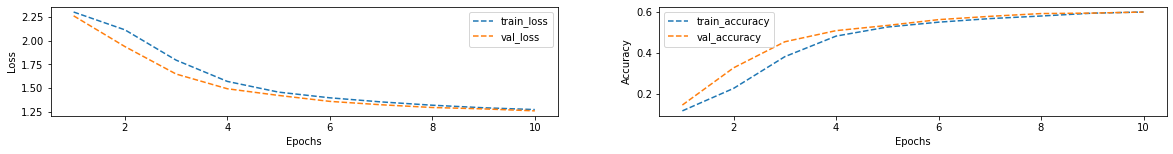

In [107]:
dict_hist=history_model_1.history
list_ep=[i for i in range(1,11)]
plt.figure(figsize=(20,2))
plt.subplot(1,2,1)
plt.plot(list_ep,dict_hist['loss'],ls='--',label='train_loss')
plt.plot(list_ep,dict_hist['val_loss'],ls='--',label='val_loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(list_ep,dict_hist['accuracy'],ls='--',label='train_accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls='--',label='val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.show()

### Observations: 
    1.Accuracy and loss are used to identify the overfitting and underfitting  problem.
    2.Learning curves are plots that show changes in learning performance over time in terms of experience.        
    3.Learning curves of model performance on the train and validation datasets can be used to diagnose an underfit, overfit
      or well-fit model.
    4.Above graph shows an underfit model which is identified by a training loss that is decreasing and continuous to decrease
      at the end of the plot. This indicates that the model is capable of further learning and possible further improvements 
      and that the training process was halted prematurely.